In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

# Import the data into Pandas

In [2]:
df = pd.read_csv('./census_17.csv', delimiter = ',')

# General Overview of the data

In [3]:
# Using pandas profiling to overview the data
dirty_census = ProfileReport(df, title = 'initial_census_data', html = {'style': {'full_width' : True}})
dirty_census

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
rows,columns = df.shape
print("The data has a total of {} rows and {} columns".format(rows,columns)) # data has a total of 9937 rows and 11 columns

The data has a total of 9937 rows and 11 columns


In [5]:
df.isnull().sum()

House Number                        2
Street                              0
First Name                          2
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2243
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2298
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9937 entries, 0 to 9936
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9935 non-null   object
 1   Street                         9937 non-null   object
 2   First Name                     9935 non-null   object
 3   Surname                        9937 non-null   object
 4   Age                            9937 non-null   object
 5   Relationship to Head of House  9937 non-null   object
 6   Marital Status                 7694 non-null   object
 7   Gender                         9937 non-null   object
 8   Occupation                     9937 non-null   object
 9   Infirmity                      9937 non-null   object
 10  Religion                       7639 non-null   object
dtypes: object(11)
memory usage: 854.1+ KB


the data type for all columns is object signifying that each column does not have a uniform data type
Some columns have empty rows(indicated by the non-null count for figures below 9937 rows)

In [7]:
df.describe(include = 'all') # gives us a bit of a feel of the data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,9935,9937,9935,9937,9937,9937,7694,9937,9937,9937,7639
unique,246,104,372,686,117,21,8,11,1129,8,14
top,1,Tannery Street,Joan,Smith,19,Head,Single,Female,Student,None,None
freq,339,1190,46,303,201,3732,3633,5241,1835,9838,3354


In [8]:
df.head(5)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,May Road,Victor,Newton-Smith,44,Head,Single,Male,Public relations account executive,None,Methodist
1,1,May Road,Clare,Bennett,43,Partner,Single,Female,Sports coach,None,None
2,1,May Road,Sophie,Newton-Smith,7,Daughter,NaN,Female,Student,None,NaN
3,2,May Road,Frances,Singh,43,Head,Single,Female,Agricultural consultant,None,Christian
4,2,May Road,Ruth,Singh,17,Daughter,NaN,Female,Student,None,NaN


# Explore the individual columns for better understanding of the data

In [9]:
df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', nan, '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '39', '40', '41', 'Fourty Two', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '38', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75',
       '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86',
       '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97',
       '98', '99', '100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '110', '111', '112', '113', '114', '115', '116',
       '117', '118', '119', '120', '121', '122', '123', '124', '125',
       '126', '127', '128', '129', '130', '131', '132', '133', '134',
       '135', '136', '137', '138', '139', '140', '141', '142

In [10]:
df['Street'].unique()

array(['May Road', 'Price Road', 'Corporation Road',
       'Canterburyspin Road', 'Henry Run', 'Sandypull Road',
       'Mitchell Stravenue', 'Corporation Lane', 'Foster Hollow',
       'Turkey Avenue', 'McCarthy Station', 'Hutchinson Spring',
       'Prince Plains', 'Taurusbait Lane', 'April Junction', 'South Lane',
       'Andrews Lane', 'Octoberdeal Road', 'Kestrel Drive', 'Music Ferry',
       'Oak Expressway', 'Runnymede Drive', 'Long Port', 'Ripon Lane',
       'Tannery Street', 'Wright Glen', 'Mitchell Turnpike',
       'First Overpass', 'Madrid Road', 'Mann Brooks', 'Coles Junctions',
       'Roberts Mountains', 'Wessex Street', 'Sheffield Parkways',
       'Bird Street', 'Nicholson Islands', 'Dublin Meadow',
       'Oaktree Spurs', 'Capricorn Road', 'Sheppard Well', 'Walker Road',
       'Guinevere Road', 'Repton Run', 'Pendragonsplit Lane',
       'Paperloop Drive', 'Stoke Track', 'Rose Stream', 'Hale Street',
       'Stirling Viaduct', 'White Road', 'Thomas Parkway', 'Jorda

In [11]:
df['First Name'].unique()

array(['Victor', 'Clare', 'Sophie', 'Frances', 'Ruth', 'Scott', 'Jane',
       'Marie', 'Lee', 'Laura', 'Gary', 'Phillip', 'Jodie', 'Joyce',
       'Joshua', 'Grace', 'Jade', 'Amy', 'Joanna', 'Stacey', 'Mark',
       'Stephen', 'Albert', 'Claire', 'Elliot', 'Naomi', 'Karen', 'Beth',
       'Charlie', 'Hollie', 'Maria', 'Tracey', 'Mohamed', 'Jordan',
       'Roger', 'Conor', 'Bethan', 'Danielle', 'Clifford', 'Amber',
       'Dennis', 'Susan', 'Derek', 'Carly', 'Jemma', 'Duncan', 'Gillian',
       'Howard', 'Oliver', 'Guy', 'Katy', 'Damian', 'Benjamin',
       'Alexandra', 'Patrick', 'Kelly', 'Donna', 'Garry', 'Sally',
       'Vincent', 'Joseph', 'Lucy', 'David', 'Karl', 'Lynn', 'Yvonne',
       'Rhys', 'Terence', 'Patricia', 'Olivia', 'Hannah', 'Marc', 'Abbie',
       'Ann', 'Carol', 'Marian', 'Mohammad', 'Jake', 'Christopher',
       'Leah', 'Timothy', 'Barbara', 'Lynda', 'Aimee', 'Charlene',
       'James', 'Katie', 'Liam', 'Jacqueline', 'Chloe', 'Declan', 'Paul',
       'Clive', 'Bev

In [12]:
df[df['First Name'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1528,25,Oak Expressway,NaN,Marion Fisher,4,Daughter,NaN,Female,Child,None,NaN
3565,168,Tannery Street,NaN,Timothy Taylor,34,Lodger,Single,Male,"Surveyor, planning and development",None,Christian


In [13]:
df['Surname'].unique()

array(['Newton-Smith', 'Bennett', 'Singh', 'Dunn', 'James', 'Smith',
       'Dobson', 'Owen', 'Quinn', 'Adams', 'Newman', 'Berry', 'Buckley',
       'Evans', 'Atkins', 'Smart', 'Watson-Smart', 'Blake-Dixon', 'Lee',
       'Parry', 'Hill', 'Lewis', 'Chamberlain', 'Williams', 'Moss',
       'Thomas', 'Chapman', 'Edwards', 'Davies', 'Stevenson',
       'Crawford-Stevenson', 'Jackson', 'Dennis', 'Richards', 'Green',
       'Rogers', 'Elliott-Stephens', 'Franklin', 'Glover-Franklin',
       'Ball', 'Clarke', 'Porter', 'Manning', 'McKenzie', 'Wilkinson',
       'Graham', 'Jones-Harvey', 'Lawrence', 'Baker', 'Jones', 'Rhodes',
       'Begum', 'Brown', 'Todd', 'Sykes', 'Taylor', 'Gilbert', 'Mills',
       'Ward', 'Lloyd', 'Hammond', 'Kerr', 'Pearce', 'Fisher', 'Knight',
       'Perkins', 'Bentley', 'Morris', 'Marshall', 'Byrne', 'Armstrong',
       'Young', 'Greenwood', 'Simpson', 'Newton', 'Stokes', 'Shaw',
       'Richardson', 'Hawkins', 'Nicholson', 'Griffiths', 'Brookes',
       'Campbell'

In [14]:
df[df['Surname'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [15]:
df['Age'].unique()

array(['44', '43', '7', '17', '33', '31', '54', '57', '24', '67', '11',
       '9', '5', '37', '32', '-1', '46', '42', '79', '52', '14', '34',
       '38', '6', '48', '56', '13', '12', '65', '64', '22', '18', '70',
       '41', '16', '75', '25', '36', '10', '55', '47', '8', '4', '51',
       '45', '15', '62', '60', '53', '35', '3', '1', '0.5', '63', '30',
       '49', '28', '0', '59', '23', '26', '68', '58', '2', '29', '50',
       '72', '71', '21', '20', '80', '83', '27', '82', '40', '88', '84',
       '77', '69', '66', '39', '76', '74', '19', '61', '85', '73', '92',
       '94', '86', '81', '97', '78', '89', '96', '93', '95', '87',
       'Sixteen', 'fourty two', '90', '103', '61.15637796', '99',
       'twenty one', '104', '112', '98', '100', '240', '66.5', '91',
       '102', '101', '49.46798826', '52.46798826', '24.5'], dtype=object)

In [16]:
df[df['Age'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [17]:
df['Relationship to Head of House'].unique()

array(['Head', 'Partner', 'Daughter', 'Wife', 'Husband', 'Grandson',
       'Granddaughter', 'Sibling', 'Lodger', 'Son', 'None',
       'Adopted Daughter', 'Cousin', 'Step-Daughter', 'Visitor',
       'Step-Son', 'Adopted Son', 'Nephew', ' ', 'Neice',
       'Adopted Grandson'], dtype=object)

In [18]:
df[df['Relationship to Head of House']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2724,38,Tannery Street,Eric,Barnes,5,,NaN,Male,Student,None,NaN
4718,72,Capricorn Road,Joyce,Mellor,34,,Single,Female,"Horticulturist, amenity",None,None
9009,146,Slater Drive,Helen,King,13,,NaN,Female,Student,None,NaN


In [19]:
df['Marital Status'].unique()

array(['Single', nan, 'Married', 'Divorced', 'Widowed', 'widowed',
       'MARRIED', 'Di-vorced', 'single'], dtype=object)

In [20]:
df[df['Marital Status'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,May Road,Sophie,Newton-Smith,7,Daughter,NaN,Female,Student,None,NaN
4,2,May Road,Ruth,Singh,17,Daughter,NaN,Female,Student,None,NaN
12,6,May Road,Phillip,Dobson,11,Grandson,NaN,Male,Student,None,NaN
13,6,May Road,Jodie,Owen,9,Granddaughter,NaN,Female,Student,None,NaN
14,6,May Road,Joyce,Owen,5,Granddaughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9915,1,Glory Folly,Justin,Whittaker,0,Son,NaN,Male,Child,None,NaN
9917,1,Wood Folly,Maurice,Iqbal-Leonard,4,Son,NaN,Male,Child,None,NaN
9918,1,Wood Folly,Naomi,Iqbal-Leonard,0,Daughter,NaN,Female,Child,None,NaN
9935,1,Williams Rectory,Bruce,Hussain,13,Son,NaN,Male,Student,None,NaN


In [21]:
df['Gender'].unique()

array(['Male', 'Female', ' ', 'Fe-male', 'male', 'Mal e', 'fema le',
       'MALE', 'FEMALE', 'female', 'Fem-ale'], dtype=object)

In [22]:
df['Occupation'].describe()

count        9937
unique       1129
top       Student
freq         1835
Name: Occupation, dtype: object

In [23]:
df[df['Occupation'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [24]:
df['Occupation'].value_counts()

Student                                             1835
University Student                                   678
Unemployed                                           623
Child                                                544
Medical physicist                                     20
                                                    ... 
Retired Teacher, English as a foreign language         1
Retired Conservation officer, historic buildings       1
Retired Surveyor, minerals                             1
Retired Therapist, occupational                        1
Retired Equality and diversity officer                 1
Name: Occupation, Length: 1129, dtype: int64

In [25]:
df['Infirmity'].unique()

array(['None', 'Mental Disability', ' ', 'Blind', 'Disabled',
       'Physical Disability', 'Deaf', 'Unknown Infection'], dtype=object)

In [26]:
df['Infirmity'].value_counts()

None                   9838
Physical Disability      20
Deaf                     16
                         15
Blind                    14
Mental Disability        12
Disabled                 12
Unknown Infection        10
Name: Infirmity, dtype: int64

In [27]:
df[df['Infirmity']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
259,10,Corporation Road,Dominic,Allen,42,Head,Single,Male,Financial controller,,None
908,24,Hutchinson Spring,Sandra,Miller,55,Head,Divorced,Female,Unemployed,,Christian
2012,1,Long Port,Catherine,Johnson,79,Wife,Married,Female,Retired Radio producer,,None
2525,9,Tannery Street,Hazel,Evans,9,Daughter,NaN,Female,Student,,NaN
2606,18,Tannery Street,Harry,Johnston,41,Son,Single,Male,Science writer,,Catholic
2718,37,Tannery Street,Dorothy,Robertson,14,Daughter,NaN,Female,Student,,NaN
3101,98,Tannery Street,Jade,Bradley,34,Head,Married,Female,"Engineer, manufacturing systems",,Methodist
3242,120,Tannery Street,Bryan,Fisher,47,Son,Single,Male,Information systems manager,,None
3607,175,Tannery Street,Vanessa,Lloyd,3,Daughter,NaN,Female,Child,,NaN
4287,9,Sheffield Parkways,Margaret,Howell,22,None,Single,Female,University Student,,None


In [28]:
df['Religion'].unique()

array(['Methodist', 'None', nan, 'Christian', 'Catholic', 'Jewish',
       'Muslim', 'Sikh', ' ', 'Private', 'Sith', 'Jedi', 'Housekeeper',
       'Quaker', 'Pagan'], dtype=object)

  # CLEANING BEGINS

# House Number

In [29]:
df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', nan, '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '39', '40', '41', 'Fourty Two', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '38', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75',
       '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86',
       '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97',
       '98', '99', '100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '110', '111', '112', '113', '114', '115', '116',
       '117', '118', '119', '120', '121', '122', '123', '124', '125',
       '126', '127', '128', '129', '130', '131', '132', '133', '134',
       '135', '136', '137', '138', '139', '140', '141', '142

In [30]:
df['House Number'].describe()

count     9935
unique     246
top          1
freq       339
Name: House Number, dtype: object

In [31]:
df[df['House Number'].isna()] # dealing with the nan values

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
37,NaN,May Road,Bethan,Lee,64,Wife,Married,Female,Conference centre manager,None,Christian
123,NaN,May Road,Ann,Brown,30,Head,Divorced,Female,IT consultant,None,None


In [32]:
# we deal with index 37  first
df[(df['Street']== 'May Road') & (df['Surname']=='Lee')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
36,13,May Road,Conor,Lee,65,Head,Married,Male,"Education officer, museum",None,Christian
37,NaN,May Road,Bethan,Lee,64,Wife,Married,Female,Conference centre manager,None,Christian
38,13,May Road,Danielle,Lee,22,Granddaughter,Divorced,Female,University Student,None,None


In [33]:
# we deal with index 123 
df[(df['Street']== 'May Road') & (df['Surname']=='Brown')] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
123,NaN,May Road,Ann,Brown,30,Head,Divorced,Female,IT consultant,None,None


In [34]:
# the above does not give me much, so I check the indexes before and after for more info
df.loc[[122,123,124]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
122,37,May Road,Richard,Begum,5,Son,NaN,Male,Student,None,NaN
123,NaN,May Road,Ann,Brown,30,Head,Divorced,Female,IT consultant,None,None
124,39,May Road,Jack,Todd,32,Head,Single,Male,"Scientist, research (medical)",Mental Disability,None


In [35]:
# we will change Fourty two to 42
df[df['House Number']== 'Fourty Two']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
135,Fourty Two,May Road,Jean,Lloyd,68,Head,Married,Female,Retired Web designer,None,None


In [36]:
df[(df['House Number']== '42') & (df['Street']== 'May Road')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
136,42,May Road,Marc,Lloyd,68,Husband,Married,Male,Retired Neurosurgeon,None,None
137,42,May Road,Antony,Lloyd,31,Son,Divorced,Male,Regulatory affairs officer,None,None


#### cleaning House Number

In [37]:
#Cleaning....

# the above shows that the members of her household lives at house number 13, so we replace them
df.loc[37,['House Number']] = ['13']

# above tells me that Ann Browns household is sandwhiched between House numbers 37 and and 39
df.loc[123,['House Number']] = ['38']

df.loc[135,['House Number']] = ['42'] #converting from fourty two
df['House Number'] = df['House Number'].astype(int)

In [38]:
df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

# Age


In [39]:
df['Age'].unique()

array(['44', '43', '7', '17', '33', '31', '54', '57', '24', '67', '11',
       '9', '5', '37', '32', '-1', '46', '42', '79', '52', '14', '34',
       '38', '6', '48', '56', '13', '12', '65', '64', '22', '18', '70',
       '41', '16', '75', '25', '36', '10', '55', '47', '8', '4', '51',
       '45', '15', '62', '60', '53', '35', '3', '1', '0.5', '63', '30',
       '49', '28', '0', '59', '23', '26', '68', '58', '2', '29', '50',
       '72', '71', '21', '20', '80', '83', '27', '82', '40', '88', '84',
       '77', '69', '66', '39', '76', '74', '19', '61', '85', '73', '92',
       '94', '86', '81', '97', '78', '89', '96', '93', '95', '87',
       'Sixteen', 'fourty two', '90', '103', '61.15637796', '99',
       'twenty one', '104', '112', '98', '100', '240', '66.5', '91',
       '102', '101', '49.46798826', '52.46798826', '24.5'], dtype=object)

In [40]:
df.loc[df['Age']=='Sixteen'] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1835,119,Oak Expressway,Megan,Lee,Sixteen,Daughter,NaN,Female,Student,None,NaN


In [41]:
df.loc[df['Age']=='fourty two']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2130,36,Ripon Lane,Christopher,Jackson,fourty two,Head,Divorced,Male,Health and safety inspector,None,Christian


In [42]:
df.loc[df['Age']=='twenty one']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2555,13,Tannery Street,Eleanor,Greenwood,twenty one,Daughter,Single,Female,University Student,None,None


In [43]:
df.loc[df['Age']== '-1'] # likely a child less than 1 year

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
17,7,May Road,Jade,Quinn,-1,Daughter,NaN,Female,Child,None,NaN


In [44]:
df.iloc[[15, 16, 17]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
15,7,May Road,Joshua,Quinn,37,Head,Married,Male,"Engineer, manufacturing systems",None,Christian
16,7,May Road,Grace,Quinn,32,Wife,Married,Female,Electrical engineer,None,None
17,7,May Road,Jade,Quinn,-1,Daughter,NaN,Female,Child,None,NaN


#### cleaning Age

In [45]:
#Cleaning....

df['Age'].replace(['Sixteen', 'fourty two','twenty one' , '-1','0.5'], ['16', '42', '21', '0','0'], inplace = True)

In [46]:
df.loc[df['Age'] == '240'] # checking the outlier record with age 240 ***lie***

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3812,14,First Overpass,Donna,Fisher,240,Lodger,Single,Female,"Designer, furniture",None,None


In [47]:
# the output above shows that this individual is not retired (checked that via occupation) , therefore still a bit young
df.loc[[3810,3811,3812,3813,3814]] #investigating members of the household to of the outlier for a better grasp. 
                                   # the output below shows this individual is unrelated to the household members
                                   # therefore in this case, the median age will be suited, since this outlier can affect the mean

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3810,14,First Overpass,Carolyn,Jones,30,Sibling,Single,Female,"Radiographer, diagnostic",None,Christian
3811,14,First Overpass,Rita,Richardson,46,Lodger,Single,Female,Unemployed,None,None
3812,14,First Overpass,Donna,Fisher,240,Lodger,Single,Female,"Designer, furniture",None,None
3813,15,First Overpass,Katy,Bennett,47,Head,Divorced,Female,Unemployed,None,Catholic
3814,15,First Overpass,Harriet,Clark,4,Daughter,NaN,Female,Child,None,NaN


In [48]:
df['Age'].dtypes # checks the data type for the age column

dtype('O')

In [49]:
df['Age'] = df['Age'].astype(float) #converts the ages to floats

In [50]:
df['Age'] = (df['Age']).apply(np.floor) # rounds down the ages

In [51]:
df['Age'] = df['Age'].astype(int) # converts all to integers

In [52]:
df['Age'].unique()

array([ 44,  43,   7,  17,  33,  31,  54,  57,  24,  67,  11,   9,   5,
        37,  32,   0,  46,  42,  79,  52,  14,  34,  38,   6,  48,  56,
        13,  12,  65,  64,  22,  18,  70,  41,  16,  75,  25,  36,  10,
        55,  47,   8,   4,  51,  45,  15,  62,  60,  53,  35,   3,   1,
        63,  30,  49,  28,  59,  23,  26,  68,  58,   2,  29,  50,  72,
        71,  21,  20,  80,  83,  27,  82,  40,  88,  84,  77,  69,  66,
        39,  76,  74,  19,  61,  85,  73,  92,  94,  86,  81,  97,  78,
        89,  96,  93,  95,  87,  90, 103,  99, 104, 112,  98, 100, 240,
        91, 102, 101])

In [53]:
df['Age'].median() # finds the median age

36.0

In [54]:
#Cleaning....
df['Age'].replace(240,36, inplace = True)

# Gender 

In [55]:
df['Gender'].unique()

array(['Male', 'Female', ' ', 'Fe-male', 'male', 'Mal e', 'fema le',
       'MALE', 'FEMALE', 'female', 'Fem-ale'], dtype=object)

In [56]:
df['Gender'].value_counts()

Female     5241
Male       4682
male          4
MALE          2
FEMALE        2
              1
Fe-male       1
Mal e         1
fema le       1
female        1
Fem-ale       1
Name: Gender, dtype: int64

In [57]:
# investigate further about the missing gender
df[df['Gender'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
77,25,May Road,Vincent,Edwards,54,Husband,Married,,Management consultant,None,Catholic


#### cleaning Age

In [58]:
#Cleaning.....

# one uniform spelling for both genders
df['Gender'].replace(['Fe-male','fema le','FEMALE','female', 'Fem-ale'],'Female', inplace = True)

df['Gender'].replace(['male', 'Mal e','MALE'], 'Male', inplace = True)

# output is indicative that this individual is male
# deduced that from his first name and Relationship to the head of house
df['Gender']. replace([' '], 'Male', inplace = True)

In [59]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

# Religion

In [60]:
df['Religion'].unique()

array(['Methodist', 'None', nan, 'Christian', 'Catholic', 'Jewish',
       'Muslim', 'Sikh', ' ', 'Private', 'Sith', 'Jedi', 'Housekeeper',
       'Quaker', 'Pagan'], dtype=object)

In [61]:
df['Religion'].mode()

0    None
dtype: object

In [62]:
df[df['Religion'].isnull()].describe()

,House Number,Age
count,2298.000000,2298.000000
mean,48.909922,9.074848
std,51.014746,5.154603
min,1.000000,0.000000
25%,12.000000,5.000000
50%,29.000000,9.000000
75%,69.000000,14.000000
max,244.000000,22.000000


In [63]:
nan_adults = df[(df['Religion'].isnull()) & (df['Age']>17)] #adults who have nan as their religion
nan_adults['Age'].max() #finding the maximum nan age in Religion

22

In [64]:
nan_adults.describe()

,House Number,Age
count,54.000000,54.000000
mean,48.685185,18.222222
std,53.334411,0.743948
min,3.000000,18.000000
25%,13.500000,18.000000
50%,32.000000,18.000000
75%,56.000000,18.000000
max,240.000000,22.000000


In [65]:
nan_kids = df[(df['Religion'].isnull()) & (df['Age']<18)] # exploring the underaged
nan_kids.describe()

,House Number,Age
count,2244.000000,2244.000000
mean,48.915330,8.854724
std,50.970028,5.013341
min,1.000000,0.000000
25%,12.000000,5.000000
50%,29.000000,9.000000
75%,70.000000,13.000000
max,244.000000,17.000000


next codes deal with religion where the value is  '  '

In [66]:
df[df['Religion'] == ' '] #adults with empty religion

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
514,22,Corporation Lane,Peter,Ellis,50,Head,Single,Male,Wellsite geologist,None,
8995,141,Slater Drive,Elaine,Taylor,37,Head,Married,Female,Unemployed,None,
9433,6,Shaw Union,Tom,Johnson,40,Husband,Married,Male,Speech and language therapist,None,


since they're only 3 records, I check members of the household of each record to get more information about the individual and draw conclusions from there

In [67]:
df[(df['Street'] == 'Corporation Lane') & (df['House Number'] == 22)] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
514,22,Corporation Lane,Peter,Ellis,50,Head,Single,Male,Wellsite geologist,None,
515,22,Corporation Lane,Ashley,Barnes,37,None,Single,Male,"Accountant, chartered public finance",None,None
516,22,Corporation Lane,Andrea,Marshall,56,None,Single,Female,"Editor, film/video",None,Catholic
517,22,Corporation Lane,Brandon,James,40,None,Single,Male,Minerals surveyor,None,None
518,22,Corporation Lane,Trevor,Wood,46,None,Single,Male,"Surveyor, building",None,Catholic


In [68]:
df[(df['Street'] == 'Slater Drive') & (df['House Number'] == 141)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8995,141,Slater Drive,Elaine,Taylor,37,Head,Married,Female,Unemployed,None,
8996,141,Slater Drive,William,Taylor,38,Husband,Married,Male,Corporate treasurer,None,None
8997,141,Slater Drive,Eleanor,Taylor,14,Daughter,NaN,Female,Student,None,NaN


In [69]:
df[(df['Street'] == 'Shaw Union') & (df['House Number'] == 6)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9432,6,Shaw Union,Amelia,Johnson,35,Head,Married,Female,Unemployed,None,None
9433,6,Shaw Union,Tom,Johnson,40,Husband,Married,Male,Speech and language therapist,None,
9434,6,Shaw Union,Jayne,Powell,43,Cousin,Single,Female,Personal assistant,None,None
9435,6,Shaw Union,Gerald,Powell,49,Cousin,Single,Male,Accounting technician,None,None
9436,6,Shaw Union,Garry,Powell,38,Cousin,Single,Male,Jewellery designer,None,None


For religions above who have  ' ' values, their household members have None as their religion, so most likely, it will be None, so I will change them to None.

the next codes investigates religion as Housekeeper

In [70]:
df[df['Religion'] == 'Housekeeper']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6766,2,Preston Trail,Francis,Bell,30,Lodger,Single,Male,Forest/woodland manager,None,Housekeeper


In [71]:
# checks household of the individual who put in Housekeeper as religion
df.loc[(df['House Number'] == 2) & (df['Street'] == 'Preston Trail')]
#the result of the output below shows that members of this household are unrelated.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6765,2,Preston Trail,Natasha,Matthews,36,Head,Single,Female,Unemployed,None,Catholic
6766,2,Preston Trail,Francis,Bell,30,Lodger,Single,Male,Forest/woodland manager,None,Housekeeper
6767,2,Preston Trail,Liam,Fitzgerald,47,Lodger,Divorced,Male,Travel agency manager,None,None
6768,2,Preston Trail,Jordan,Rowe,41,Cousin,Single,Male,IT sales professional,None,Catholic
6769,2,Preston Trail,Naomi,Hawkins,24,Lodger,Single,Female,"Nurse, mental health",None,Catholic


In [72]:
# there is no such religion as Housekeeper. His househould shows him as unrelated to the Household head.
#Since he is the only one in the distribution who has 'Housekeeper' as religion, the mode religion is used as replacement

next line ivestigates religion as Jedi

In [73]:
# check the household of the individual who put in Jedi as religion
df.loc[(df['House Number'] == 13) & (df['Street'] == 'Nicholson Islands')]
#the result of the output below shows that this household does not have any religion as the husband has None and the daughter has nan as religion respectively

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4517,13,Nicholson Islands,Linda,Norris,42,Head,Married,Female,Corporate treasurer,None,Jedi
4518,13,Nicholson Islands,James,Norris,43,Husband,Married,Male,"Copywriter, advertising",None,None
4519,13,Nicholson Islands,Nicola,Norris,14,Daughter,NaN,Female,Student,None,NaN


the next lines investigates religion as sith

In [74]:
df[df['Religion'] == 'Sith']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2344,175,Ripon Lane,Albert,Brown,27,Head,Single,Male,Arboriculturist,None,Sith


In [75]:
df.loc[(df['House Number'] == 175) & (df['Street'] == 'Ripon Lane')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2344,175,Ripon Lane,Albert,Brown,27,Head,Single,Male,Arboriculturist,None,Sith


In [76]:
# the individual above lives alone and is the only person in the entire set with this fake religion

the next lines investigates Religion as private

In [77]:
df[df['Religion'] == 'Private'] # only one person in the dataset, so will most likely be a lie

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2073,2,Ripon Lane,Suzanne,Brennan,21,Head,Single,Female,University Student,None,Private


In [78]:
df[(df['House Number']== 2) & (df['Street']=='Ripon Lane')]# only one person in the dataset, so will most likely be a lie

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2073,2,Ripon Lane,Suzanne,Brennan,21,Head,Single,Female,University Student,None,Private


#### cleaning religion

In [79]:
#Cleaning...

# so the number of the entire adults who put in nan for religion is 54. 
# I would want to go over each record and check their individual households and then deduce their religion,
# but given time constraint, I would assume that given that the maximum age of 22yrs of the individuals who put nan as religion,
# they are still undecided about their religion and still need time to process what religion they want to be associated with.
#therefore, I will group them as None and wait perhaps in the next census, they will have chosen a religion
df.loc[(df['Religion'].isnull()) & (df['Age']>17), 'Religion'] = 'None'



# I am also going to change Housekeeper and Jedi, since they have only one entry in the distribution and they are not a  religion.
#Linda Norris household shows that her husband has no religion therefore it is most likely she does not have one too
df['Religion'].replace(['Jedi', 'Housekeeper', ' ', 'Sith', 'Private'], 'None', inplace = True)

In [80]:
df['Religion'].unique()

array(['Methodist', 'None', nan, 'Christian', 'Catholic', 'Jewish',
       'Muslim', 'Sikh', 'Quaker', 'Pagan'], dtype=object)

#  Relationship with Head of HouseHold

In [81]:
df['Relationship to Head of House'].unique()

array(['Head', 'Partner', 'Daughter', 'Wife', 'Husband', 'Grandson',
       'Granddaughter', 'Sibling', 'Lodger', 'Son', 'None',
       'Adopted Daughter', 'Cousin', 'Step-Daughter', 'Visitor',
       'Step-Son', 'Adopted Son', 'Nephew', ' ', 'Neice',
       'Adopted Grandson'], dtype=object)

In [82]:
df[df['Relationship to Head of House']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2724,38,Tannery Street,Eric,Barnes,5,,NaN,Male,Student,None,NaN
4718,72,Capricorn Road,Joyce,Mellor,34,,Single,Female,"Horticulturist, amenity",None,None
9009,146,Slater Drive,Helen,King,13,,NaN,Female,Student,None,NaN


In [83]:
#Investigating each household
df.loc[(df['House Number'] == 38) & (df['Street'] == 'Tannery Street')] #is a son

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2721,38,Tannery Street,Kayleigh,Barnes,36,Head,Divorced,Female,"Designer, exhibition/display",None,Christian
2722,38,Tannery Street,Rita,Barnes,9,Daughter,NaN,Female,Student,None,NaN
2723,38,Tannery Street,Carolyn,Barnes,7,Daughter,NaN,Female,Student,None,NaN
2724,38,Tannery Street,Eric,Barnes,5,,NaN,Male,Student,None,NaN
2725,38,Tannery Street,Janice,Barnes,1,Daughter,NaN,Female,Child,None,NaN


In [84]:
df.loc[(df['House Number'] == 72) & (df['Street'] == 'Capricorn Road')] # most likely None

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4717,72,Capricorn Road,Toby,Walsh,38,Head,Single,Male,"Programme researcher, broadcasting/film/video",None,Catholic
4718,72,Capricorn Road,Joyce,Mellor,34,,Single,Female,"Horticulturist, amenity",None,None


In [85]:
#from the name of the age of the child, we can tell that it is a daughter and a twin
df.loc[(df['Street'] == 'Slater Drive')& (df['House Number'] == 146)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9007,146,Slater Drive,Lewis,King,52,Head,Married,Male,Field trials officer,None,None
9008,146,Slater Drive,Rosemary,King,48,Wife,Married,Female,"Psychologist, educational",None,None
9009,146,Slater Drive,Helen,King,13,,NaN,Female,Student,None,NaN
9010,146,Slater Drive,Jade,King,13,Daughter,NaN,Female,Student,None,NaN


In [86]:
#check for underaged head of household
df.loc[(df['Age'] < 18) & (df['Relationship to Head of House'] == 'Head')] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4323,21,Sheffield Parkways,Tony,Jones,17,Head,Single,Male,Unemployed,None,NaN
4633,21,Capricorn Road,Janet,Brown,16,Head,Single,Female,Unemployed,None,NaN
8663,10,Slater Drive,Lorraine,Wright,17,Head,Married,Female,Student,None,NaN


In [87]:
df.loc[(df['Street'] == 'Sheffield Parkways')& (df['House Number'] == 21)] # Investigate index 4323

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4323,21,Sheffield Parkways,Tony,Jones,17,Head,Single,Male,Unemployed,None,NaN
4324,21,Sheffield Parkways,Glenn,Jones,0,Son,NaN,Male,Child,None,NaN
4325,21,Sheffield Parkways,Gillian,Hudson,37,Lodger,Divorced,Female,Mechanical engineer,None,Christian


In [88]:
df.loc[(df['Street'] == 'Capricorn Road')& (df['House Number'] == 21)]# Investigate index 4633

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4633,21,Capricorn Road,Janet,Brown,16,Head,Single,Female,Unemployed,None,NaN
4634,21,Capricorn Road,Colin,Brennan,30,Lodger,Divorced,Male,Banker,None,Christian


In [89]:
df.loc[(df['Street'] == 'Slater Drive')& (df['House Number'] == 10)]# Investigate index 8663

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8663,10,Slater Drive,Lorraine,Wright,17,Head,Married,Female,Student,None,NaN
8664,10,Slater Drive,Justin,Wright,20,Husband,Married,Male,University Student,None,None
8665,10,Slater Drive,Frederick,Wright,0,Son,NaN,Male,Child,None,NaN


#### cleaning Relationship to Head of Head of House

In [90]:
#Cleaning.....

# Eric is male and from his surname and age, I can deduce his relationship is Son
df.loc[2724,['Relationship to Head of House']] = ['Son']

# Joyce seems an independent adult and there is credible proof to suggest her relationship with the head of household,
# so, I would replace the ' ' with None
df.loc[4718,['Relationship to Head of House']] = ['None']

#replace the ' ' value with daughter
df.loc[9009,['Relationship to Head of House']] = ['Daughter']

# I left the underaged head of house hold untouched because UK permits 16 and 17 year old to live independently under special circumstance (uk.gov, 2020)

# Street

In [91]:
df['Street'].unique()

array(['May Road', 'Price Road', 'Corporation Road',
       'Canterburyspin Road', 'Henry Run', 'Sandypull Road',
       'Mitchell Stravenue', 'Corporation Lane', 'Foster Hollow',
       'Turkey Avenue', 'McCarthy Station', 'Hutchinson Spring',
       'Prince Plains', 'Taurusbait Lane', 'April Junction', 'South Lane',
       'Andrews Lane', 'Octoberdeal Road', 'Kestrel Drive', 'Music Ferry',
       'Oak Expressway', 'Runnymede Drive', 'Long Port', 'Ripon Lane',
       'Tannery Street', 'Wright Glen', 'Mitchell Turnpike',
       'First Overpass', 'Madrid Road', 'Mann Brooks', 'Coles Junctions',
       'Roberts Mountains', 'Wessex Street', 'Sheffield Parkways',
       'Bird Street', 'Nicholson Islands', 'Dublin Meadow',
       'Oaktree Spurs', 'Capricorn Road', 'Sheppard Well', 'Walker Road',
       'Guinevere Road', 'Repton Run', 'Pendragonsplit Lane',
       'Paperloop Drive', 'Stoke Track', 'Rose Stream', 'Hale Street',
       'Stirling Viaduct', 'White Road', 'Thomas Parkway', 'Jorda

In [92]:
df[df['Street'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [93]:
df[df['Street']==' '] # no issues

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


# # First Name

In [94]:
df['First Name'].unique()

array(['Victor', 'Clare', 'Sophie', 'Frances', 'Ruth', 'Scott', 'Jane',
       'Marie', 'Lee', 'Laura', 'Gary', 'Phillip', 'Jodie', 'Joyce',
       'Joshua', 'Grace', 'Jade', 'Amy', 'Joanna', 'Stacey', 'Mark',
       'Stephen', 'Albert', 'Claire', 'Elliot', 'Naomi', 'Karen', 'Beth',
       'Charlie', 'Hollie', 'Maria', 'Tracey', 'Mohamed', 'Jordan',
       'Roger', 'Conor', 'Bethan', 'Danielle', 'Clifford', 'Amber',
       'Dennis', 'Susan', 'Derek', 'Carly', 'Jemma', 'Duncan', 'Gillian',
       'Howard', 'Oliver', 'Guy', 'Katy', 'Damian', 'Benjamin',
       'Alexandra', 'Patrick', 'Kelly', 'Donna', 'Garry', 'Sally',
       'Vincent', 'Joseph', 'Lucy', 'David', 'Karl', 'Lynn', 'Yvonne',
       'Rhys', 'Terence', 'Patricia', 'Olivia', 'Hannah', 'Marc', 'Abbie',
       'Ann', 'Carol', 'Marian', 'Mohammad', 'Jake', 'Christopher',
       'Leah', 'Timothy', 'Barbara', 'Lynda', 'Aimee', 'Charlene',
       'James', 'Katie', 'Liam', 'Jacqueline', 'Chloe', 'Declan', 'Paul',
       'Clive', 'Bev

In [95]:
df[(df['House Number']== 4) & (df['Street']== 'Gracebond Lane')]#investigating index 9831..names need to be joined by -

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9831,4,Gracebond Lane,Melanie Sarah,Hall,66,Head,Married,Female,"Engineer, communications",None,Christian
9832,4,Gracebond Lane,Liam,Hall,69,Husband,Married,Male,Retired Commissioning editor,None,Christian


In [96]:
df[(df['House Number']== 1) & (df['Street']== 'Dublin Rectory')] #investigating index 9859..names need to be joined

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9857,1,Dublin Rectory,Rachael,Nixon,63,Head,Single,Female,Toxicologist,None,None
9858,1,Dublin Rectory,Richard,Farrell,48,None,Single,Male,Structural engineer,None,Catholic
9859,1,Dublin Rectory,Gavin Drew,Hope,56,None,Single,Male,Early years teacher,None,Christian
9860,1,Dublin Rectory,Joshua,Brown,63,None,Single,Male,Armed forces technical officer,None,None
9861,1,Dublin Rectory,Rachael,Taylor,49,None,Divorced,Female,Aeronautical engineer,None,Methodist
9862,1,Dublin Rectory,Angela,Allen,30,None,Divorced,Female,Product designer,None,Catholic
9863,1,Dublin Rectory,Suzanne,Atkins,63,None,Single,Female,Administrator,None,Christian
9864,1,Dublin Rectory,Toby,Bryant,53,None,Single,Male,Psychiatric nurse,None,Christian
9865,1,Dublin Rectory,Lucy,Lee,27,None,Single,Female,Farm manager,None,None
9866,1,Dublin Rectory,Geoffrey,Newman,60,None,Single,Male,Physiological scientist,None,Christian


next lines of code checks for nan values

In [97]:
#finding the nan values
df[df['First Name'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1528,25,Oak Expressway,NaN,Marion Fisher,4,Daughter,NaN,Female,Child,None,NaN
3565,168,Tannery Street,NaN,Timothy Taylor,34,Lodger,Single,Male,"Surveyor, planning and development",None,Christian


In [98]:
# investigating index 1528
df[(df['House Number']== 25) & (df['Street']== 'Oak Expressway')] #has the first and last name sanwhiched together

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1526,25,Oak Expressway,Molly,Fisher,32,Head,Single,Female,Colour technologist,None,None
1527,25,Oak Expressway,Oliver,Morrison,37,Partner,Single,Male,Psychiatric nurse,None,None
1528,25,Oak Expressway,NaN,Marion Fisher,4,Daughter,NaN,Female,Child,None,NaN


In [99]:
# investigating index 3565
df[(df['House Number']== 168) & (df['Street']== 'Tannery Street')] #has the first and last name sanwhiched together

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3561,168,Tannery Street,Maria,Hayward,26,Head,Married,Female,Music tutor,None,Christian
3562,168,Tannery Street,Stanley,Hayward,31,Husband,Married,Male,"Editor, film/video",None,Christian
3563,168,Tannery Street,Lauren,Hayward,1,Daughter,NaN,Female,Child,None,NaN
3564,168,Tannery Street,Daniel,Bell,32,Lodger,Single,Male,Further education lecturer,None,None
3565,168,Tannery Street,NaN,Timothy Taylor,34,Lodger,Single,Male,"Surveyor, planning and development",None,Christian


the next lines of code checks for '  ' values

In [100]:
#checking for empty value
df[df['First Name']== ' '] #missing first name ' '

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
903,22,Hutchinson Spring,,Thompson,13,Daughter,NaN,Female,Student,None,NaN
7841,46,Marshall Road,,Gardner,52,Husband,Married,Male,"Physicist, medical",None,Christian


In [101]:
#investigate index 903
df[(df['House Number']== 22) & (df['Street']== 'Hutchinson Spring')] # does not have first name

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
900,22,Hutchinson Spring,Connor,Thompson,50,Head,Married,Male,Technical author,None,Christian
901,22,Hutchinson Spring,Melanie,Thompson,48,Wife,Married,Female,Illustrator,None,Christian
902,22,Hutchinson Spring,Alison,Thompson,21,Daughter,Single,Female,University Student,None,None
903,22,Hutchinson Spring,,Thompson,13,Daughter,NaN,Female,Student,None,NaN


In [102]:
#investigate index 7841
df[(df['House Number']== 46) & (df['Street']== 'Marshall Road')] # does not have first name

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7840,46,Marshall Road,Alison,Gardner,48,Head,Married,Female,Copy,None,Christian
7841,46,Marshall Road,,Gardner,52,Husband,Married,Male,"Physicist, medical",None,Christian
7842,46,Marshall Road,Stacey,Gardner,22,Daughter,Single,Female,University Student,Disabled,Christian
7843,46,Marshall Road,Ruth,Gardner,20,Daughter,Single,Female,Sports therapist,None,None
7844,46,Marshall Road,Samuel,Gardner,16,Son,NaN,Male,Student,None,NaN


In [103]:
df[df['First Name']== 'D'] # only has initial first name

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5968,96,Hale Street,D,Scott,11,Son,NaN,Male,Student,None,NaN


In [104]:
df[(df['House Number']== 96) & (df['Street']== 'Hale Street')] #investigates the household

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5965,96,Hale Street,Molly,Scott,49,Head,Married,Female,Insurance broker,None,Catholic
5966,96,Hale Street,Reece,Scott,49,Husband,Married,Male,Museum education officer,None,None
5967,96,Hale Street,Molly,Scott,15,Daughter,NaN,Female,Student,None,NaN
5968,96,Hale Street,D,Scott,11,Son,NaN,Male,Student,None,NaN
5969,96,Hale Street,Bradley,Scott,9,Son,NaN,Male,Student,None,NaN


In [105]:
df[df['First Name']== 'G'] # only has initial first name

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7382,27,Hazel Creek,G,Leonard,35,None,Single,Male,Orthoptist,None,None


In [106]:
df[(df['House Number']== 27) & (df['Street']== 'Hazel Creek')] #investigate further

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7380,27,Hazel Creek,Zoe,Sims,27,Head,Single,Female,Systems analyst,None,None
7381,27,Hazel Creek,Margaret,Clarke,37,None,Single,Female,"Therapist, occupational",None,Methodist
7382,27,Hazel Creek,G,Leonard,35,None,Single,Male,Orthoptist,None,None
7383,27,Hazel Creek,John,Welch,31,None,Single,Male,Interior and spatial designer,None,Catholic
7384,27,Hazel Creek,Sara,Pritchard,54,None,Single,Female,Health visitor,None,None
7385,27,Hazel Creek,Neil,Williams,22,None,Single,Male,University Student,None,None


#### Cleaning First Name

In [107]:
#Cleaning.......

# the most logical thing for me to do will be to assign the surname in place of first name
df.loc[7841,['First Name']] = ['Gardner']

#seperate the names by a hyphen
df.loc[9831,['First Name']] = ['Melanie-Sarah']
df.loc[9859,['First Name']] = ['Gavin-Drew']

df.loc[1528,['First Name','Surname']] = ['Marion','Fisher'] 
df.loc[3565,['First Name','Surname']] = ['Timothy','Taylor']

# the most logical thing for me to do will be to assign the surname in place of first name
df.loc[903,['First Name']] = ['Thompson'] 

 

# Surname

In [108]:
df['Surname'].unique()

array(['Newton-Smith', 'Bennett', 'Singh', 'Dunn', 'James', 'Smith',
       'Dobson', 'Owen', 'Quinn', 'Adams', 'Newman', 'Berry', 'Buckley',
       'Evans', 'Atkins', 'Smart', 'Watson-Smart', 'Blake-Dixon', 'Lee',
       'Parry', 'Hill', 'Lewis', 'Chamberlain', 'Williams', 'Moss',
       'Thomas', 'Chapman', 'Edwards', 'Davies', 'Stevenson',
       'Crawford-Stevenson', 'Jackson', 'Dennis', 'Richards', 'Green',
       'Rogers', 'Elliott-Stephens', 'Franklin', 'Glover-Franklin',
       'Ball', 'Clarke', 'Porter', 'Manning', 'McKenzie', 'Wilkinson',
       'Graham', 'Jones-Harvey', 'Lawrence', 'Baker', 'Jones', 'Rhodes',
       'Begum', 'Brown', 'Todd', 'Sykes', 'Taylor', 'Gilbert', 'Mills',
       'Ward', 'Lloyd', 'Hammond', 'Kerr', 'Pearce', 'Fisher', 'Knight',
       'Perkins', 'Bentley', 'Morris', 'Marshall', 'Byrne', 'Armstrong',
       'Young', 'Greenwood', 'Simpson', 'Newton', 'Stokes', 'Shaw',
       'Richardson', 'Hawkins', 'Nicholson', 'Griffiths', 'Brookes',
       'Campbell'

In [109]:
df.loc[df['Surname'].str.contains(' ')] # column does not contain spaces between the strings

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7488,57,Hazel Creek,Hannah,,30,Head,Married,Female,Unemployed,None,Catholic


In [110]:
df[df['Surname'] == ' '] # empty columns

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7488,57,Hazel Creek,Hannah,,30,Head,Married,Female,Unemployed,None,Catholic


In [111]:
# investigate the household
df[(df['Street']== 'Hazel Creek') & (df['House Number']==57)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7488,57,Hazel Creek,Hannah,,30,Head,Married,Female,Unemployed,None,Catholic
7489,57,Hazel Creek,Terence,Brookes,27,Husband,Married,Male,Financial planner,None,Catholic
7490,57,Hazel Creek,Maurice,Brookes,1,Son,NaN,Male,Child,None,NaN
7491,57,Hazel Creek,Julian,McLean,49,Lodger,Single,Male,"Conservator, furniture",None,Catholic


#### cleaning Surname

In [112]:
#Cleaning

#it looks most likely that Hannah is the wife to Terrence Brookes since both have religion, are married and theres a son 
df.loc[7488,['Surname']] = ['Brookes']

# Marital Status

In [113]:
df['Marital Status'].unique()

array(['Single', nan, 'Married', 'Divorced', 'Widowed', 'widowed',
       'MARRIED', 'Di-vorced', 'single'], dtype=object)

In [114]:
nan_marital_child =len(df[(df['Marital Status'].isna()) &(df['Age']<17)]) 
nan_marital_child

2129

In [115]:
nan_marital_adult =(df['Marital Status'].isna()) &(df['Age']>17)
df[nan_marital_adult] #some adults have nan

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2362,188,Ripon Lane,Susan,Thomas,19,Daughter,NaN,Female,Student,None,None
2938,70,Tannery Street,Jayne,Barry,18,Granddaughter,NaN,Female,Student,None,None


In [116]:
df[(df['Marital Status'].notnull()) & (df['Age']<18)] #looking for children whose marital status is not nan

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4323,21,Sheffield Parkways,Tony,Jones,17,Head,Single,Male,Unemployed,None,NaN
4633,21,Capricorn Road,Janet,Brown,16,Head,Single,Female,Unemployed,None,NaN
8663,10,Slater Drive,Lorraine,Wright,17,Head,Married,Female,Student,None,NaN


In [117]:
#investigate index 4323
df[(df['House Number']== 21) & (df['Street']== 'Sheffield Parkways')] #is not married but has a son (does not make him mature enough to have a marital status)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4323,21,Sheffield Parkways,Tony,Jones,17,Head,Single,Male,Unemployed,None,NaN
4324,21,Sheffield Parkways,Glenn,Jones,0,Son,NaN,Male,Child,None,NaN
4325,21,Sheffield Parkways,Gillian,Hudson,37,Lodger,Divorced,Female,Mechanical engineer,None,Christian


In [118]:
#investigate index 4633
df[(df['House Number']== 21) & (df['Street']== 'Capricorn Road')] # still underaged to have a marital status

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4633,21,Capricorn Road,Janet,Brown,16,Head,Single,Female,Unemployed,None,NaN
4634,21,Capricorn Road,Colin,Brennan,30,Lodger,Divorced,Male,Banker,None,Christian


In [119]:
#investigate index 8663
df[(df['House Number']== 10) & (df['Street']== 'Slater Drive')] # Uk law allows marriage the age of 16 years above with parental consent, so this left as is

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8663,10,Slater Drive,Lorraine,Wright,17,Head,Married,Female,Student,None,NaN
8664,10,Slater Drive,Justin,Wright,20,Husband,Married,Male,University Student,None,None
8665,10,Slater Drive,Frederick,Wright,0,Son,NaN,Male,Child,None,NaN


#### cleaning Marital Status

In [120]:
#Cleaning....

df['Marital Status'].replace(['widowed','MARRIED', 'Di-vorced', 'single'], ['Widowed','Married','Divorced','Single'], inplace = True)

#overaged nan
df.loc[2362,['Marital Status']] = ['Single']
df.loc[2938,['Marital Status']] = ['Single']

#underaged non-nan
df.loc[4323,['Marital Status']] = [np.nan] # anybody less than 18years is classed as a child according to UK law
df.loc[4633,['Marital Status']] = [np.nan]

In [121]:
df[(df['Marital Status']=='Divorced') & (df['Age']<21)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 140 to 9848
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   71 non-null     int32 
 1   Street                         71 non-null     object
 2   First Name                     71 non-null     object
 3   Surname                        71 non-null     object
 4   Age                            71 non-null     int32 
 5   Relationship to Head of House  71 non-null     object
 6   Marital Status                 71 non-null     object
 7   Gender                         71 non-null     object
 8   Occupation                     71 non-null     object
 9   Infirmity                      71 non-null     object
 10  Religion                       71 non-null     object
dtypes: int32(2), object(9)
memory usage: 6.1+ KB


In [122]:
df[(df['Marital Status']=='Widowed') & (df['Age']<20)] # as no proof suggests lies, left as is.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
511,21,Corporation Lane,Jill,Davies,18,Daughter,Widowed,Female,Student,None,None
4388,39,Sheffield Parkways,Gordon,Hill,18,Son,Widowed,Male,Student,None,None
4501,9,Nicholson Islands,Eleanor,Shepherd-Jones,19,Daughter,Widowed,Female,University Student,None,Catholic
6060,128,Hale Street,Duncan,Wong,18,Son,Widowed,Male,Student,None,None
7819,40,Marshall Road,Stephanie,Shaw,18,Lodger,Widowed,Female,Student,None,None
9907,1,Glory Folly,Elliot,Whittaker,18,Son,Widowed,Male,Student,None,None


In [123]:
df[(df['House Number']== 21) & (df['Street']== 'Corporation Lane')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
509,21,Corporation Lane,Marcus,Davies,46,Head,Single,Male,Glass blower/designer,None,Catholic
510,21,Corporation Lane,Katy,Dennis,43,Partner,Single,Female,Environmental education officer,None,Catholic
511,21,Corporation Lane,Jill,Davies,18,Daughter,Widowed,Female,Student,None,None
512,21,Corporation Lane,Henry,Davies,16,Son,NaN,Male,Student,None,NaN
513,21,Corporation Lane,Elaine,Davies,13,Daughter,NaN,Female,Student,None,NaN


In [124]:
df[(df['House Number']== 40) & (df['Street']== 'Marshall Road')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7816,40,Marshall Road,Jacqueline,Moran,42,Head,Widowed,Female,Dancer,None,Christian
7817,40,Marshall Road,Elliott,Moran,1,Son,NaN,Male,Child,None,NaN
7818,40,Marshall Road,Mary,Francis,23,Lodger,Single,Female,"Conservation officer, historic buildings",None,Christian
7819,40,Marshall Road,Stephanie,Shaw,18,Lodger,Widowed,Female,Student,None,None


In [125]:
df[(df['House Number']== 39) & (df['Street']== 'Sheffield Parkways')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4386,39,Sheffield Parkways,Natasha,Hill,34,Head,Married,Female,Tax inspector,None,Jewish
4387,39,Sheffield Parkways,Allan,Hill,41,Husband,Married,Male,Forensic psychologist,None,Jewish
4388,39,Sheffield Parkways,Gordon,Hill,18,Son,Widowed,Male,Student,None,None
4389,39,Sheffield Parkways,Terence,Hill,17,Son,NaN,Male,Student,None,NaN
4390,39,Sheffield Parkways,Ann,Hill,15,Daughter,NaN,Female,Student,None,NaN


# Occupation

In [126]:
df['Occupation'].unique()

array(['Public relations account executive', 'Sports coach', 'Student',
       ..., 'Retired Teacher, special educational needs',
       'Retired Designer, jewellery',
       'Retired Equality and diversity officer'], dtype=object)

In [127]:
df['Occupation'].value_counts().head(10)

Student                                                  1835
University Student                                        678
Unemployed                                                623
Child                                                     544
Medical physicist                                          20
Armed forces logistics/support/administrative officer      19
Trading standards officer                                  19
Civil engineer, contracting                                18
PhD Student                                                17
Agricultural engineer                                      17
Name: Occupation, dtype: int64

In [128]:
df['Occupation'].isna().sum()

0

In [129]:
df[df['Occupation']== ' '] # 3 adults who have not listed their occupation

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
298,2,Henry Run,Sam,Williams,40,Husband,Married,Male,,None,Christian
2611,20,Tannery Street,Sally,Wilkinson,38,Head,Married,Female,,None,Christian
9749,15,Hunter Prairie,Shaun,Griffiths,27,Head,Single,Male,,None,Christian


In [130]:
df[(df['Street']== 'Henry Run') & (df['House Number'] == 2)] #investigate index 298

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
297,2,Henry Run,Jean,Williams,42,Head,Married,Female,Chartered management accountant,None,Christian
298,2,Henry Run,Sam,Williams,40,Husband,Married,Male,,None,Christian
299,2,Henry Run,Kyle,Williams,9,Son,NaN,Male,Student,None,NaN


In [131]:
df[(df['Street']== 'Tannery Street') & (df['House Number'] == 20)] #investigate index 2611

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2611,20,Tannery Street,Sally,Wilkinson,38,Head,Married,Female,,None,Christian
2612,20,Tannery Street,Robert,Wilkinson,40,Husband,Married,Male,Mechanical engineer,None,None
2613,20,Tannery Street,Dylan,Wilkinson,6,Son,NaN,Male,Student,None,NaN
2614,20,Tannery Street,Zoe,Wilkinson,5,Daughter,NaN,Female,Student,None,NaN
2615,20,Tannery Street,Leonard,Wilkinson,1,Son,NaN,Male,Child,None,NaN


In [132]:
df[(df['Street']== 'Hunter Prairie') & (df['House Number'] == 15)]#investigate index 9749

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9749,15,Hunter Prairie,Shaun,Griffiths,27,Head,Single,Male,,None,Christian
9750,15,Hunter Prairie,Gemma,Marshall,22,Partner,Single,Female,University Student,None,Christian


In [133]:
#Finding underaged workers
occ_18 = df['Occupation'].where(df['Age'] < 18)



In [134]:
occ_18.value_counts()

Student       1698
Child          544
Unemployed       2
Name: Occupation, dtype: int64

In [135]:
df[(df['Age'] < 18) & (df['Occupation']== 'Unemployed')] # there are two Unemployed underaged who are heads of the household

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4323,21,Sheffield Parkways,Tony,Jones,17,Head,NaN,Male,Unemployed,None,NaN
4633,21,Capricorn Road,Janet,Brown,16,Head,NaN,Female,Unemployed,None,NaN


In [136]:
df[(df['Street']== 'Sheffield Parkways') & (df['House Number'] == 21)] #investigate index 4323

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4323,21,Sheffield Parkways,Tony,Jones,17,Head,NaN,Male,Unemployed,None,NaN
4324,21,Sheffield Parkways,Glenn,Jones,0,Son,NaN,Male,Child,None,NaN
4325,21,Sheffield Parkways,Gillian,Hudson,37,Lodger,Divorced,Female,Mechanical engineer,None,Christian


In [137]:
df[(df['Street']== 'Capricorn Road') & (df['House Number'] == 21)] #investigate index 4633

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4633,21,Capricorn Road,Janet,Brown,16,Head,NaN,Female,Unemployed,None,NaN
4634,21,Capricorn Road,Colin,Brennan,30,Lodger,Divorced,Male,Banker,None,Christian


In [138]:
df['Occupation'].mode()

0    Student
dtype: object

#### cleaning Occupation

In [139]:
#Cleaning....

# for the underaged unemployed individuals(17 and 16yrs), I have decided to leave them as is because according to the Uk law, they can claim unemployed allowance

# The the ' ' values in occupation might indicate the individuals are unemployed, hence ' '
df['Occupation'].replace(' ','Unemployed', inplace = True)

df['Occupation']= df['Occupation'].str.upper()

# Infirmity

In [140]:
df['Infirmity'].unique()

array(['None', 'Mental Disability', ' ', 'Blind', 'Disabled',
       'Physical Disability', 'Deaf', 'Unknown Infection'], dtype=object)

In [141]:
df['Infirmity'].value_counts()

None                   9838
Physical Disability      20
Deaf                     16
                         15
Blind                    14
Mental Disability        12
Disabled                 12
Unknown Infection        10
Name: Infirmity, dtype: int64

In [142]:
df[df['Infirmity']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
259,10,Corporation Road,Dominic,Allen,42,Head,Single,Male,FINANCIAL CONTROLLER,,None
908,24,Hutchinson Spring,Sandra,Miller,55,Head,Divorced,Female,UNEMPLOYED,,Christian
2012,1,Long Port,Catherine,Johnson,79,Wife,Married,Female,RETIRED RADIO PRODUCER,,None
2525,9,Tannery Street,Hazel,Evans,9,Daughter,NaN,Female,STUDENT,,NaN
2606,18,Tannery Street,Harry,Johnston,41,Son,Single,Male,SCIENCE WRITER,,Catholic
2718,37,Tannery Street,Dorothy,Robertson,14,Daughter,NaN,Female,STUDENT,,NaN
3101,98,Tannery Street,Jade,Bradley,34,Head,Married,Female,"ENGINEER, MANUFACTURING SYSTEMS",,Methodist
3242,120,Tannery Street,Bryan,Fisher,47,Son,Single,Male,INFORMATION SYSTEMS MANAGER,,None
3607,175,Tannery Street,Vanessa,Lloyd,3,Daughter,NaN,Female,CHILD,,NaN
4287,9,Sheffield Parkways,Margaret,Howell,22,None,Single,Female,UNIVERSITY STUDENT,,None


#### cleaning Infirmity

In [143]:
# Cleaning....

#The most logical explanation for empty infirmity status is that the individual does not have an infirmity
df['Infirmity'].replace(' ', 'None', inplace = True)

# End of Cleaning...saving to a new CSV file

In [144]:
df.to_csv('./cleancensus.csv', index = False, header = True)

In [145]:
clean_df = pd.read_csv('./cleancensus.csv', delimiter = ',')  # opening the new clean census

In [146]:
# Using pandas profiling to overview the clean data
clean_census = ProfileReport(clean_df, title = 'clean_census_data', html = {'style': {'full_width' : True}})


In [147]:
clean_census

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [148]:
clean_census.to_file("my_report.html") # exporting the file

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [149]:
clean_df.info() # initial exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9937 entries, 0 to 9936
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9937 non-null   int64 
 1   Street                         9937 non-null   object
 2   First Name                     9937 non-null   object
 3   Surname                        9937 non-null   object
 4   Age                            9937 non-null   int64 
 5   Relationship to Head of House  9937 non-null   object
 6   Marital Status                 7694 non-null   object
 7   Gender                         9937 non-null   object
 8   Occupation                     9937 non-null   object
 9   Infirmity                      9937 non-null   object
 10  Religion                       7693 non-null   object
dtypes: int64(2), object(9)
memory usage: 854.1+ KB


In [150]:
clean_df.describe()

,House Number,Age
count,9937.000000,9937.000000
mean,48.251283,36.595854
std,51.013011,21.722936
min,1.000000,0.000000
25%,11.000000,19.000000
50%,28.000000,36.000000
75%,67.000000,52.000000
max,245.000000,112.000000



# ANALYSIS AND VISUALIZATIONS

In [151]:
%matplotlib inline

### Age Pyramid

next lines is a function to create age bands for creating the age pyramid

In [152]:
def age_group(age): # function to create Age Groups
    if age <= 4:
        return "0-4"
    elif age <= 9:
        return  "5-9"
    elif age <=14:
        return "10-14"
    elif age <19:
        return "15-19"
    elif age <=24:
        return "20-24"
    elif age <=29:
        return "25-29"
    elif age <=34:
        return "30-34"
    elif age <= 39:
        return "35-39"
    elif age <=44:
        return "40-44"
    elif age <=49:
        return "45-49"
    elif age <= 54:
        return "50-54"
    elif age <=59:
        return "55-59"
    elif age <=64:
        return "60-64"
    elif age <= 69:
        return "65-69"
    elif age <=74:
        return "70-74"
    elif age<=79:
        return "75-79"
    elif age <= 84:
        return "80-84"
    elif age <=89:
        return "85-89"
    elif age <=94:
        return "90-94"
    elif age <=99:
        return "95-99"
    elif age > 99:
        return "100+"
    
    
    

In [153]:
clean_df['Age Group']= clean_df["Age"].apply(age_group) # use the function to bin the ages into age groups and crate a new column in the dataframe

In [154]:
clean_df['Age Group']

0       40-44
1       40-44
2         5-9
3       40-44
4       15-19
        ...  
9932    55-59
9933    20-24
9934    20-24
9935    10-14
9936    10-14
Name: Age Group, Length: 9937, dtype: object

In [155]:
female = clean_df[clean_df['Gender']== 'Female'] # filter out the females

In [156]:
male =clean_df[clean_df['Gender']== 'Male'] # filter out the males

In [157]:
f= female['Age Group'].value_counts() 

In [158]:
m =male['Age Group'].value_counts()

In [159]:
m.index

Index(['20-24', '40-44', '35-39', '45-49', '5-9', '50-54', '30-34', '10-14',
       '15-19', '25-29', '0-4', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80-84', '85-89', '90-94', '100+', '95-99'],
      dtype='object')

In [160]:
f.index # check to see the index exist

Index(['20-24', '40-44', '35-39', '30-34', '45-49', '25-29', '10-14', '50-54',
       '5-9', '55-59', '15-19', '0-4', '60-64', '65-69', '70-74', '75-79',
       '80-84', '85-89', '95-99', '90-94', '100+'],
      dtype='object')

In [161]:
f.values # checks to see the values exist

array([500, 468, 455, 428, 382, 355, 353, 336, 313, 269, 266, 266, 247,
       176, 168, 123,  81,  43,   7,   6,   5], dtype=int64)

In [162]:
m= m*-1 # multuply the male by -1 so that we can plot the values on the -ve X axis

In [163]:
age_Class=['100+','95-99', '90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59', '50-54', '45-49','40-44','35-39','30-34','25-29', '20-24', '15-19','10-14','5-9','0-4' ]

In [164]:
m # checking to see the male Age group was filtered correctly

20-24   -433
40-44   -389
35-39   -356
45-49   -339
5-9     -336
50-54   -330
30-34   -323
10-14   -313
15-19   -298
25-29   -282
0-4     -278
55-59   -231
60-64   -224
65-69   -171
70-74   -147
75-79    -97
80-84    -74
85-89    -41
90-94    -15
100+      -7
95-99     -6
Name: Age Group, dtype: int64

 next lines of codes plot the Age Pyramid below

Text(0.5, 1.0, 'Age Pyramid')

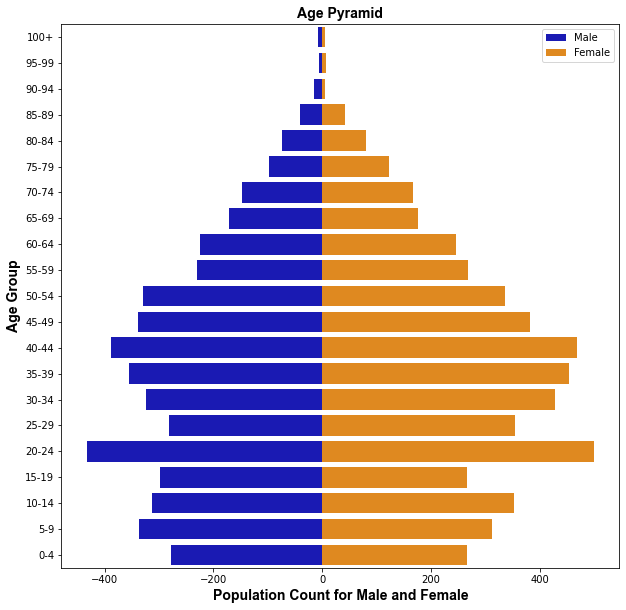

In [165]:
font = {'family': 'Arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 14,
        }
plt.figure(figsize= (10,10))
age_pyramid = sns.barplot(x= m.values, y= m.index, order= age_Class, color= ('mediumblue'), label = 'Male')
age_pyramid = sns.barplot(x= f.values, y = f.index, order= age_Class, color = ('darkorange'), label = 'Female')
plt.xlabel('Population Count for Male and Female', fontdict = font)
plt.ylabel('Age Group', fontdict = font)
age_pyramid.legend()
plt.title('Age Pyramid', fontdict = font)

the next lines of codes investigates on why there is a burst in 20-24 year olds

In [166]:
age_19s = clean_df[clean_df['Age'].between(15,19)]

In [167]:
age_19s['Occupation'].value_counts() # observed that  STUDENT (520) and UNIVERSITY STUDENT (225) are the majority in this age band

STUDENT                              520
UNIVERSITY STUDENT                   225
UNEMPLOYED                             4
DESIGNER, FASHION/CLOTHING             1
ENGINEER, MINING                       1
SURVEYOR, LAND/GEOMATICS               1
CLINICAL BIOCHEMIST                    1
PRODUCT DESIGNER                       1
SURGEON                                1
PHYSIOTHERAPIST                        1
FARM MANAGER                           1
FINANCIAL CONTROLLER                   1
FINE ARTIST                            1
STATISTICIAN                           1
PRODUCER, TELEVISION/FILM/VIDEO        1
ENGINEER, STRUCTURAL                   1
TAX INSPECTOR                          1
PLANNING AND DEVELOPMENT SURVEYOR      1
PRESS PHOTOGRAPHER                     1
Name: Occupation, dtype: int64

In [168]:
age_20s = clean_df[clean_df['Age'].between(20,24)] # investigating the burst in the age group

In [169]:
age_20s['Occupation'].value_counts() # More university students immigrated to this town

UNIVERSITY STUDENT                453
UNEMPLOYED                         15
CIVIL ENGINEER, CONTRACTING         4
DANCE MOVEMENT PSYCHOTHERAPIST      4
BUYER, RETAIL                       3
                                 ... 
RESEARCH SCIENTIST (MEDICAL)        1
MUSEUM/GALLERY CONSERVATOR          1
TRADING STANDARDS OFFICER           1
JEWELLERY DESIGNER                  1
COMMERCIAL HORTICULTURIST           1
Name: Occupation, Length: 212, dtype: int64

In [170]:
age_25s = clean_df[clean_df['Age'].between(25,29)]

In [171]:
age_25s['Occupation'].value_counts() # university students have left the town

UNEMPLOYED                     54
PHD STUDENT                     9
LOSS ADJUSTER, CHARTERED        6
MEDICAL PHYSICIST               4
FORENSIC SCIENTIST              4
                               ..
INSURANCE UNDERWRITER           1
SCIENTIST, BIOMEDICAL           1
MUSIC TUTOR                     1
CIVIL SERVICE FAST STREAMER     1
RADIO BROADCAST ASSISTANT       1
Name: Occupation, Length: 378, dtype: int64

In [172]:
clean_df['Gender'].value_counts()# investigates the ratio of males to females

Female    5247
Male      4690
Name: Gender, dtype: int64

### Religion: Does the government need to provide an alternative place of worship

In [173]:
clean_df['Religion'].unique()

array(['Methodist', 'None', nan, 'Christian', 'Catholic', 'Jewish',
       'Muslim', 'Sikh', 'Quaker', 'Pagan'], dtype=object)

In [174]:
religious = clean_df[(clean_df['Religion']!= 'None') & (clean_df['Religion'].notnull())]
len(religious)

4278

<AxesSubplot:title={'center':'Religion Practiced'}, xlabel='Age', ylabel='Religion'>

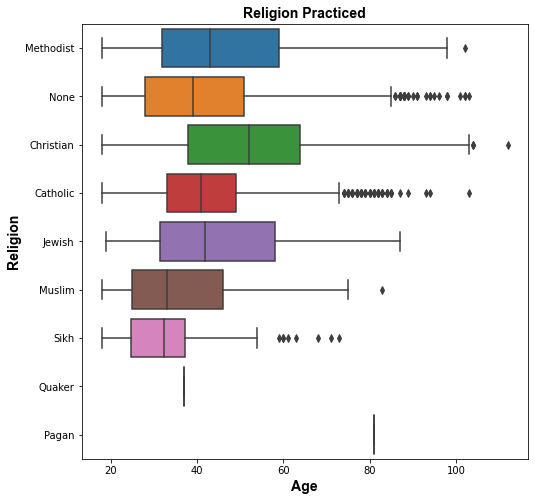

In [175]:
plt.figure(figsize=(8,8))
plt.xlabel('Religion', fontdict = font)
plt.ylabel('Age', fontdict = font)
age_pyramid.legend()
plt.title('Religion Practiced', fontdict = font)

sns.boxplot(data = clean_df, x= 'Age', y = 'Religion')

In [176]:
religion_median = clean_df.groupby(['Religion'])['Age'].median()
religion_median

Religion
Catholic     41.0
Christian    52.0
Jewish       42.0
Methodist    43.0
Muslim       33.0
None         39.0
Pagan        81.0
Quaker       37.0
Sikh         32.5
Name: Age, dtype: float64

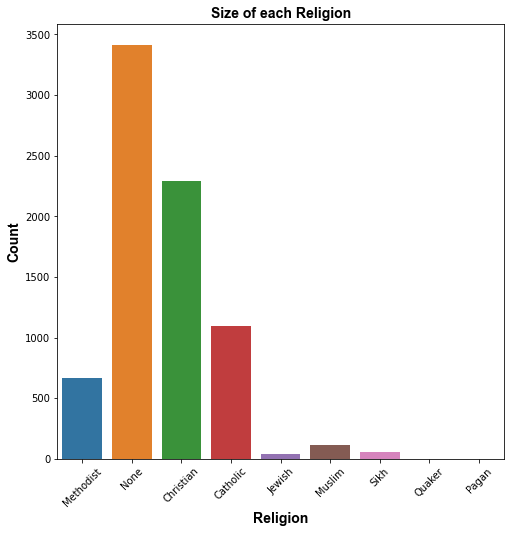

In [177]:

plt.figure(figsize =(8,8))
sns.countplot(data =clean_df, x = 'Religion')
plt.title('Size of each Religion',fontdict = font)
plt.xlabel('Religion', fontdict = font)
plt.ylabel('Count', fontdict= font)
plt.xticks(rotation = 45)
plt.show()

In [178]:
religion_count = clean_df.groupby(['Religion'])['Age'].count()
religion_count

Religion
Catholic     1096
Christian    2293
Jewish         43
Methodist     668
Muslim        116
None         3415
Pagan           1
Quaker          1
Sikh           60
Name: Age, dtype: int64

the next plots investigates religions that are transmitting their religions to their off sping and are growing

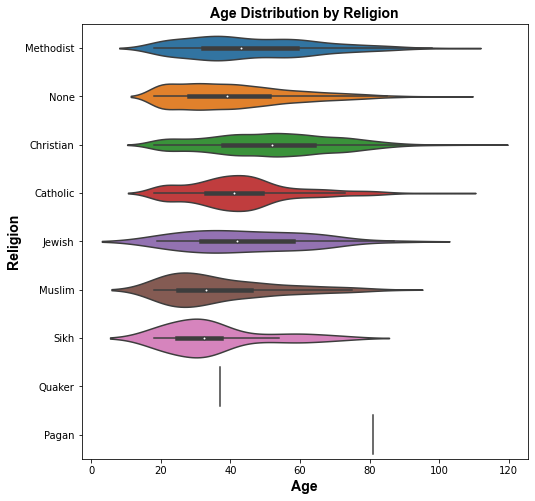

In [179]:

plt.figure(figsize =(8,8))
sns.violinplot(data =clean_df, x ='Age', y = 'Religion')

plt.title('Age Distribution by Religion',fontdict = font)
plt.xlabel('Age', fontdict = font)
plt.ylabel('Religion', fontdict= font)
plt.show()

In [180]:
#filtering by age to confirm which religion transmits their religion to their young
right_age =clean_df[(clean_df['Age'].between(18,45))] # to find the fertile group of the population who are likely to grow the religion
right_age. head(5)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
0,1,May Road,Victor,Newton-Smith,44,Head,Single,Male,PUBLIC RELATIONS ACCOUNT EXECUTIVE,None,Methodist,40-44
1,1,May Road,Clare,Bennett,43,Partner,Single,Female,SPORTS COACH,None,None,40-44
3,2,May Road,Frances,Singh,43,Head,Single,Female,AGRICULTURAL CONSULTANT,None,Christian,40-44
5,3,May Road,Scott,Dunn,33,Head,Married,Male,TECHNICAL AUTHOR,None,None,30-34
6,3,May Road,Jane,Dunn,31,Wife,Married,Female,SET DESIGNER,None,None,30-34


<AxesSubplot:xlabel='Age', ylabel='Religion'>

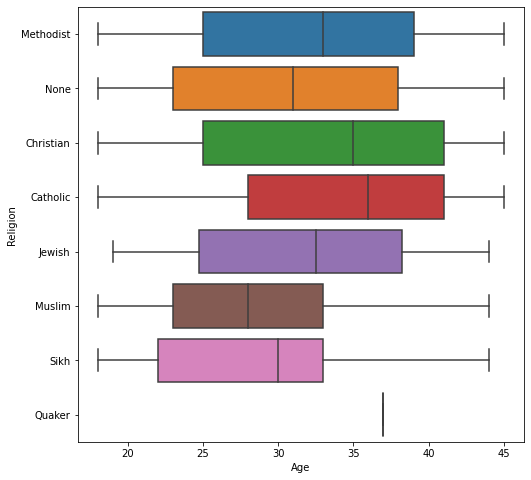

In [181]:
plt.figure(figsize=(8,8))

sns.boxplot(data = right_age, x= 'Age', y = 'Religion', ) 

(16.5, 49.5)

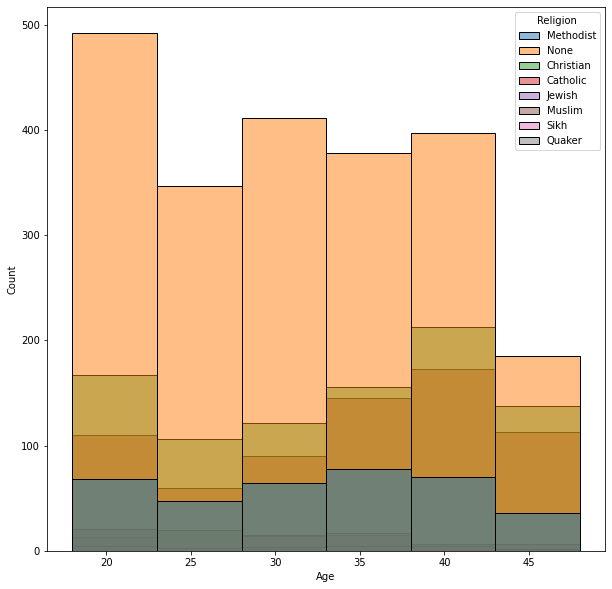

In [182]:
plt.figure(figsize =(10,10))
sns.histplot(data = right_age, x= 'Age',  hue= 'Religion', binwidth=5, multiple= 'layer')
plt.xlim()

In [183]:
right_age_religion = right_age['Religion'].value_counts()

In [184]:
right_age_percentage =  np.round((right_age_religion/sum(right_age_religion))*100,2)
right_age_percentage

None         51.12
Christian    20.84
Catholic     15.98
Methodist     8.40
Muslim        1.97
Sikh          1.11
Jewish        0.56
Quaker        0.02
Name: Religion, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Religion'>

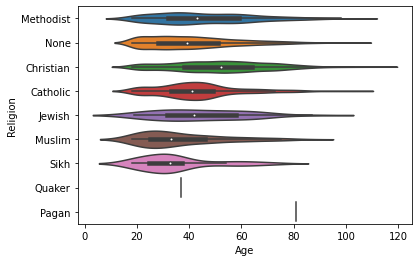

In [185]:
sns.violinplot(data = clean_df, x= 'Age', y = 'Religion')

### Commuters

In [186]:
aero = len(clean_df[clean_df['Occupation'].str.contains(pat = 'AERO')])

In [187]:
crew = len(clean_df[clean_df['Occupation'].str.contains(pat = 'CREW')])

In [188]:
air_broker = len(clean_df[clean_df['Occupation'].str.contains(pat = 'AIR BROKER')])

In [189]:
ship = len(clean_df[clean_df['Occupation'].str.contains(pat = 'SHIP')])

In [190]:
traffic = len(clean_df[clean_df['Occupation'].str.contains(pat = 'TRAFFIC')])

In [191]:
pilot = len(clean_df[clean_df['Occupation'].str.contains(pat = 'PILOT')])

In [192]:
fish =len(clean_df[clean_df['Occupation'].str.contains(pat = 'FISH')]) #commuters with water (fisheries)

In [193]:
water = len(clean_df[clean_df['Occupation'].str.contains(pat = 'WATER')]) #commuters with water (water)

In [194]:
ocean = len(clean_df[clean_df['Occupation'].str.contains(pat = 'OCEAN')]) # commuters with ocean

In [195]:
phd = len(clean_df[clean_df['Occupation'].str.contains(pat = 'PHD')])

In [196]:
prof = len(clean_df[clean_df['Occupation'].str.contains(pat = 'PROFESSOR')])

In [197]:
lecturer = len(clean_df[clean_df['Occupation'].str.contains(pat = 'LECTURER')])

In [198]:
university = (len(clean_df[clean_df['Occupation']== 'UNIVERSITY STUDENT']))

In [199]:
academic = len(clean_df[clean_df['Occupation'].str.contains(pat = 'ACADEMIC')])

In [200]:
commuters = university + water + fish+ pilot+ traffic + ship + air_broker + crew+ aero+ ocean +phd +prof +lecturer + academic
print("Total commuters are ", commuters)
percentage_pop = (commuters/len(df))*100
print("The percentage of commuters is {:.2f} " .format(percentage_pop) )

Total commuters are  950
The percentage of commuters is 9.56 


### IS THERE A DEMAND FOR MORE HOUSING?
##### DIFFERENCE BETWEEN THE AVERAGE OCCUPANCY PER HOUSE AND NO OF PEOPLE ACTUALLY LIVING IN GIVEN HOUSE

In [201]:
clean_df[clean_df["Street"] == "Andrews Lane"].head(3) #CHECKING what a street looks like

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
1207,1,Andrews Lane,Brandon,Hale,54,Head,Widowed,Male,MEDIA PLANNER,None,Christian,50-54
1208,2,Andrews Lane,Jayne,Phillips,43,Head,Single,Female,HUMAN RESOURCES OFFICER,None,None,40-44
1209,2,Andrews Lane,Heather,Mason,29,None,Single,Female,MAKE,None,None,25-29


In [202]:
grouphousehold = clean_df.groupby(["Street", "House Number"]).agg({"First Name": np.size}) #groups by household and counts the no of occupants in each house and gives us the total number of houses
grouphousehold

First Name
Street       House Number            
Andrews Lane 1                      1
             2                      2
             3                      4
             4                      3
             5                      2
...                               ...
Yucca Vista  4                      1
             5                      1
             6                      1
             7                      1
             8                      1

[3718 rows x 1 columns]

In [203]:
meanoccupants =round(grouphousehold["First Name"].agg(np.mean)) #gets the mean occupants per house hold
meanoccupants # shows that on the average, there are only 3 occupants per household in the population

3

In [204]:
grouphouseholdr = grouphousehold.reset_index()# resetting this to a data frame index

In [205]:
grouphouseholdr.tail(10)

,Street,House Number,First Name
3708,Wright Glen,5,1
3709,Wright Glen,6,2
3710,Yucca Vista,1,1
3711,Yucca Vista,2,2
3712,Yucca Vista,3,2
3713,Yucca Vista,4,1
3714,Yucca Vista,5,1
3715,Yucca Vista,6,1
3716,Yucca Vista,7,1
3717,Yucca Vista,8,1


In [206]:
clean_df[(clean_df['Street']== 'Woodward Crossing') & (clean_df['House Number']== 28)] # sample investigation into above homes mean ocupancy rate

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
7922,28,Woodward Crossing,Louise,Lawrence,37,Head,Married,Female,IMMIGRATION OFFICER,None,None,35-39
7923,28,Woodward Crossing,Maurice,Lawrence,41,Husband,Married,Male,FAST FOOD RESTAURANT MANAGER,None,None,40-44
7924,28,Woodward Crossing,Alice,Hunter,6,Daughter,NaN,Female,STUDENT,None,NaN,5-9
7925,28,Woodward Crossing,Julie,Hunter,2,Daughter,NaN,Female,CHILD,None,NaN,0-4


In [207]:
clean_df[(clean_df['Street']== 'Andrews Lane') & (clean_df['House Number']== 3)] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
1210,3,Andrews Lane,Sandra,Francis,42,Head,Divorced,Female,UNEMPLOYED,None,Christian,40-44
1211,3,Andrews Lane,Ryan,Francis,20,Son,Single,Male,UNIVERSITY STUDENT,None,Christian,20-24
1212,3,Andrews Lane,Jonathan,Francis,16,Son,NaN,Male,STUDENT,None,NaN,15-19
1213,3,Andrews Lane,Lisa,Francis,15,Daughter,NaN,Female,STUDENT,None,NaN,15-19


In [208]:
clean_df[(clean_df['Street']== 'Andrews Lane') & (clean_df['House Number']== 19)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
1253,19,Andrews Lane,Linda,Faulkner,52,Head,Single,Female,UNEMPLOYED,None,None,50-54
1254,19,Andrews Lane,Geoffrey,Faulkner,18,Son,Single,Male,STUDENT,None,None,15-19
1255,19,Andrews Lane,Graham,Faulkner,14,Son,NaN,Male,STUDENT,None,NaN,10-14
1256,19,Andrews Lane,Alexandra,Faulkner,13,Daughter,NaN,Female,STUDENT,None,NaN,10-14


In [209]:
clean_df[(clean_df['Street']== 'April Junction') & (clean_df['House Number']== 23)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
1138,23,April Junction,Leah,Smith,42,Head,Married,Female,SPORTS ADMINISTRATOR,None,None,40-44
1139,23,April Junction,Mark,Smith,42,Husband,Married,Male,UNEMPLOYED,None,None,40-44
1140,23,April Junction,Katy,Smith,12,Daughter,NaN,Female,STUDENT,None,NaN,10-14
1141,23,April Junction,Phillip,Smith,6,Son,NaN,Male,STUDENT,None,NaN,5-9


In [210]:
occupancydiff = meanoccupants - grouphouseholdr["First Name"]# we subtract the occupancy per house hold from the mean to determine if there is overcrowding and need for more housing
need = occupancydiff.reset_index(name = "-ve or +ve density")
need

,index,-ve or +ve density
0,0,2
1,1,1
2,2,-1
3,3,0
4,4,1
...,...,...
3713,3713,2
3714,3714,2
3715,3715,2
3716,3716,2


In [211]:
pop_housing_need = need['-ve or +ve density']<0
print(pop_housing_need.value_counts())

False    2766
True      952
Name: -ve or +ve density, dtype: int64


In [212]:
print("the number of households who are above the mean house occupancy is 952")

print("the percentage of household this represents is ",round(((952/3718)*100),2))

the number of households who are above the mean house occupancy is 952
the percentage of household this represents is  25.61


In [213]:
len(clean_df[clean_df['Relationship to Head of House']== 'Lodger'])

380

In [214]:
len(clean_df[clean_df['Relationship to Head of House']== 'Visitor'])

29

the next lines of codes check for affluent occupations

In [215]:
careers = ['AERO','PILOT','ENGINEER', 'DOCTOR','MEDICAL', 'LAWYER', 'EXECUTIVE', 'CONSULTANT', 'MANAGER', 'CYTOGENTICIST',
           'PHARMACIST', 'MIDWIFE','NURSE','INVESTMENT', 'SURGEON','CHIROPRACTOR','ANALYST','CLINICAL','EMBRYOLOGIST', 'ARCHITECT'
           'ACCOUNTANT', 'ACUPUCTURIST', 'TECHNIC', 'PSYCHIATRIST', 'CONTRACTOR', 'HEAMATOLOGIST', 'ASTRONOMER', 'PATHOLOGIST',
           'THERAPIST', 'AFFLUENT', 'HEMEOPATH','HERPETOLOGIST', 'SCIENTIST', 'PSYCHOLOGIST', 'DEVELOPER', 'PSYCHOLOGIST', 'PROFESSOR',
           'GEOPHYSICIST', 'BUYER', 'OPHTAMOLOGIST', 'OPTOMETRIST', 'CHEMIST', 'BANKER', 'MERCHANT', 'THERAPIST', 'MERCHANDISER',
           'ORTHOPTIST', 'RADIOGRAPHER', 'DIPLOMAT','DERMATOLOGIST', 'DEVELOPER', 'GENETICIST', 'PROGRAMMER', 'SEISMOLOGIST', 'METEOROLOGIST',
           'CHEIF', 'PODIATRIST', 'MUDLOGGER', 'ONCOLOGIST', 'BROKER', 'HERPETOLOGIST', 'DIETICIAN', 'SENIOR', 'CONTROLLER',
          ]

def check_affluence(x):
    for career in careers:
        if career in x:
            return "Affluent"
    return "Not Affluent"

In [216]:
affluence = clean_df.copy(deep = True) # create another dataframe for investigation of affluent households occupancy rate

In [217]:
affluence['Affluence'] = affluence["Occupation"].apply(check_affluence)

In [218]:
affluence.head(3)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Affluence
0,1,May Road,Victor,Newton-Smith,44,Head,Single,Male,PUBLIC RELATIONS ACCOUNT EXECUTIVE,None,Methodist,40-44,Affluent
1,1,May Road,Clare,Bennett,43,Partner,Single,Female,SPORTS COACH,None,None,40-44,Not Affluent
2,1,May Road,Sophie,Newton-Smith,7,Daughter,NaN,Female,STUDENT,None,NaN,5-9,Not Affluent


In [219]:
affluence['Affluence'].value_counts()

Not Affluent    6867
Affluent        3070
Name: Affluence, dtype: int64

In [220]:
affluence_pop = affluence[affluence["Affluence"]=='Affluent'] #extracting only the affluent households from the population
pop_of_affluence = affluence_pop['Affluence'].value_counts()
print("  Adult population who is ", pop_of_affluence)

  Adult population who is  Affluent    3070
Name: Affluence, dtype: int64


In [221]:
# Uk workforce is age 18 to 64 . We try to get the number of working population
working_occupation =(affluence['Occupation']!= 'STUDENT') & (affluence['Occupation']!= 'UNIVERSITY STUDENT') & (affluence['Occupation']!= 'CHILD') &(affluence['Age'].between(16,64))
total_working = affluence[working_occupation]
print("The total number of the city's workfroce is  ", len(total_working))

The total number of the city's workfroce is   5713


In [222]:
#comparing the number of affluent occupations to the total working population.
affluentvsworkingpop =round(( ((len(affluence_pop ))/(len(total_working)))*100),2)
print ("Of the labor force, {} percent are affluent" .format(affluentvsworkingpop))

Of the labor force, 53.74 percent are affluent


In [223]:
# from the above, 3070 individuals of the population are affluent
# to find the % of the population that are affluent
percentage_affluence = ((pop_of_affluence.values/len(clean_df))*100)
print("The percentage of affluent people in the general population is  ", percentage_affluence.round(decimals = 2))
      

The percentage of affluent people in the general population is   [30.89]


In [224]:
#we then check for the occupancy per household of the affluent
affluent_household = affluence_pop.groupby(["Street", "House Number"]).agg({"First Name": np.size}) #groups by household and counts the no of occupants in each house and gives us the total number of houses
affluent_household

First Name
Street       House Number            
Andrews Lane 6                      1
             7                      3
             10                     2
             12                     2
             20                     1
...                               ...
Wright Glen  4                      1
             5                      1
             6                      1
Yucca Vista  2                      2
             3                      1

[2169 rows x 1 columns]

In [225]:
mean_affluent_household_occupancy = round((affluent_household['First Name'].sum())/2169) # we find the mean occupancy of the affluent
mean_affluent_household_occupancy

1

In [226]:
affluent_mean_diff = mean_affluent_household_occupancy - affluent_household['First Name'] #we try to find the variance
aff_house = affluent_mean_diff.reset_index(name = 'change')
aff_house.head(10)

,Street,House Number,change
0,Andrews Lane,6,0
1,Andrews Lane,7,-2
2,Andrews Lane,10,-1
3,Andrews Lane,12,-1
4,Andrews Lane,20,0
5,Andrews Lane,22,0
6,Andrews Lane,26,-1
7,Andrews Lane,27,0
8,Andrews Lane,29,-1
9,Andrews Lane,30,0


In [227]:
aff_house[aff_house['change']<-2] # investigates affluent households above mean affluent household occupancy

,Street,House Number,change
209,Corporation Lane,27,-3
242,Dublin Rectory,1,-5
273,East Hold,1,-3
293,First Overpass,9,-6
295,First Overpass,11,-7
299,First Overpass,17,-4
377,Hale Street,57,-3
428,Hale Street,150,-3
517,Hazel Creek,61,-3
696,Khan Street,22,-3


In [228]:
# sample investigation in the crowded homes
affluence[(affluence['Street']== 'Tannery Street') & (clean_df['House Number']== 17)] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Affluence
2582,17,Tannery Street,Tracy,Morgan,43,Head,Single,Female,UNEMPLOYED,None,Christian,40-44,Not Affluent
2583,17,Tannery Street,Paula,Morgan,18,Daughter,Divorced,Female,STUDENT,None,Christian,15-19,Not Affluent
2584,17,Tannery Street,Rita,Morgan,15,Daughter,NaN,Female,STUDENT,None,NaN,15-19,Not Affluent
2585,17,Tannery Street,Rachel,Morgan,11,Daughter,NaN,Female,STUDENT,None,NaN,10-14,Not Affluent
2586,17,Tannery Street,Amanda,Morgan,7,Daughter,NaN,Female,STUDENT,None,NaN,5-9,Not Affluent
2587,17,Tannery Street,Teresa,Morgan,4,Daughter,NaN,Female,CHILD,None,NaN,0-4,Not Affluent
2588,17,Tannery Street,Ellie,Morgan,3,Daughter,NaN,Female,CHILD,None,NaN,0-4,Not Affluent
2589,17,Tannery Street,Gerard,Turner,44,Lodger,Divorced,Male,CORPORATE INVESTMENT BANKER,None,Christian,40-44,Affluent
2590,17,Tannery Street,Tony,Peters,47,Sibling,Single,Male,LOCATION MANAGER,None,None,45-49,Affluent
2591,17,Tannery Street,Lucy,Parry,60,Lodger,Single,Female,GENERAL PRACTICE DOCTOR,None,Christian,60-64,Affluent


In [229]:
affluence[(affluence['Street']== 'Tannery Street') & (clean_df['House Number']== 87)] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Affluence
3028,87,Tannery Street,Carole,Porter,74,Head,Married,Female,RETIRED STAGE MANAGER,None,Christian,70-74,Affluent
3029,87,Tannery Street,Christian,Porter,69,Husband,Married,Male,RETIRED NAVAL ARCHITECT,None,Christian,65-69,Not Affluent
3030,87,Tannery Street,Bruce,Porter,59,Son,Single,Male,CLINICAL MOLECULAR GENETICIST,None,Christian,55-59,Affluent
3031,87,Tannery Street,Victoria,Porter,58,Daughter,Single,Female,"THERAPIST, MUSIC",None,Christian,55-59,Affluent
3032,87,Tannery Street,Mandy,Porter,56,Daughter,Single,Female,SALES PROMOTION ACCOUNT EXECUTIVE,None,Christian,55-59,Affluent
3033,87,Tannery Street,Patricia,Porter,53,Daughter,Single,Female,BOOKSELLER,None,None,50-54,Not Affluent
3034,87,Tannery Street,June,Porter,53,Daughter,Single,Female,PUBLIC AFFAIRS CONSULTANT,None,Christian,50-54,Affluent
3035,87,Tannery Street,Mohamed,Porter,52,Son,Single,Male,ADVERTISING COPYWRITER,None,Christian,50-54,Not Affluent
3036,87,Tannery Street,Dennis,Porter,50,Son,Single,Male,UNEMPLOYED,None,Christian,50-54,Not Affluent
3037,87,Tannery Street,Alex,Thomas-Porter,49,Son,Single,Male,ENVIRONMENTAL MANAGER,None,Christian,45-49,Affluent


In [230]:
lack_housing = aff_house['change']<0 #we sum all the negative values
lack_housing.value_counts()

False    1526
True      643
Name: change, dtype: int64

In [231]:
percentage_affluent_lacking_housing = round(((643/2169)*100),2) # divide by the total affluent households in the population
compare_entire_household = (643/3718)*100                     # divide by the total number of house holds in the population
print("The percentage of the affluent household above the average affluent occupancy rate is : ",percentage_affluent_lacking_housing)
print("This accounts for {:.2f} percent of the entire population household ".format(compare_entire_household))

The percentage of the affluent household above the average affluent occupancy rate is :  29.64
This accounts for 17.29 percent of the entire population household 


## UNEMPLOYMENT TREND

In [232]:
#we forecast unemployment trend by taking a subset of the population and assume 
#that the size of the workforce remains same for each year.
unemployed = (clean_df['Occupation']== 'UNEMPLOYED') & (clean_df['Age'].between(16,64))
clean_df[unemployed].head(5)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
7,4,May Road,Marie,James,54,Head,Married,Female,UNEMPLOYED,None,None,50-54
25,10,May Road,Elliot,Buckley,34,Husband,Married,Male,UNEMPLOYED,None,Catholic,30-34
29,11,May Road,Charlie,Smart,42,Husband,Married,Male,UNEMPLOYED,None,None,40-44
101,32,May Road,Jacqueline,Porter,35,Head,Divorced,Female,UNEMPLOYED,None,Methodist,35-39
106,33,May Road,Beverley,McKenzie,30,Head,Divorced,Female,UNEMPLOYED,None,Methodist,30-34


In [233]:
current_subset = clean_df[unemployed].groupby('Age').size().sort_index(ascending = True)
current_subset

Age
16     1
17     1
19     2
21     1
22     1
23     6
24     7
25    10
26    12
27     8
28    10
29    14
30    14
31    16
32    17
33    13
34    28
35    18
36    16
37    16
38    19
39    24
40    19
41    13
42    20
43    13
44    21
45    20
46    24
47    19
48    10
49    12
50    16
51     6
52    11
53     8
54    11
55     9
56    10
57    10
58     7
59    11
60     4
61    11
62    11
63     7
64     8
dtype: int64

In [234]:
later_subset = current_subset.shift(-1)
later_subset

Age
16     1.0
17     2.0
19     1.0
21     1.0
22     6.0
23     7.0
24    10.0
25    12.0
26     8.0
27    10.0
28    14.0
29    14.0
30    16.0
31    17.0
32    13.0
33    28.0
34    18.0
35    16.0
36    16.0
37    19.0
38    24.0
39    19.0
40    13.0
41    20.0
42    13.0
43    21.0
44    20.0
45    24.0
46    19.0
47    10.0
48    12.0
49    16.0
50     6.0
51    11.0
52     8.0
53    11.0
54     9.0
55    10.0
56    10.0
57     7.0
58    11.0
59     4.0
60    11.0
61    11.0
62     7.0
63     8.0
64     NaN
dtype: float64

In [235]:
diff_subset = current_subset - later_subset #finds the difference between the two subsets
diff_subset  = diff_subset .reset_index(name= 'Increase or Decrease') # resets the index and gives a new column name to the ner variable created
diff_subset

,Age,Increase or Decrease
0,16,0.0
1,17,-1.0
2,19,1.0
3,21,0.0
4,22,-5.0
5,23,-1.0
6,24,-3.0
7,25,-2.0
8,26,4.0
9,27,-2.0


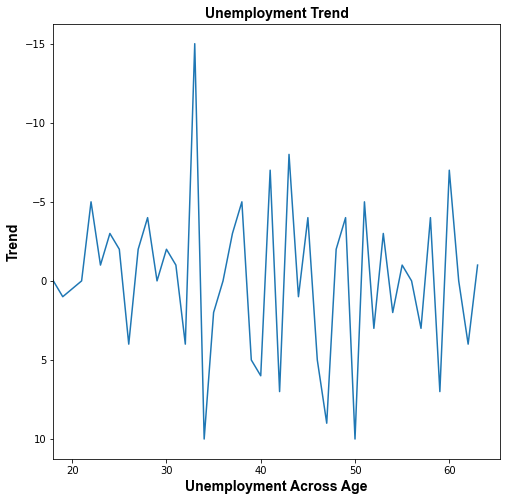

In [236]:
# we see the unemployment trend as the a -ve number indicates increase in unemployment trend and a positive number indicates a decrease in unemployment 
plt.figure(figsize= (8,8))
sns.lineplot(data =diff_subset, x ='Age', y= 'Increase or Decrease')
plt.title("Unemployment Trend", fontdict = font)
plt.ylabel('Trend', fontdict = font)
plt.xlabel('Unemployment Across Age', fontdict = font)
plt.gca().invert_yaxis()
plt.xlim(18)
plt.show()

In [237]:
#currently, the graph shows an upward trend towards unemployment, although presently does not have issues with unemploymen

##### Unemployment rate

In [238]:
# Uk workforce is age 18 to 64 . We get the number of working population
select_occupation =(clean_df['Occupation']!= 'STUDENT') & (clean_df['Occupation']!= 'UNIVERSITY STUDENT') & (clean_df['Occupation']!= 'CHILD') &(clean_df['Age'].between(16,64))
total_workforce = (clean_df[select_occupation])
total_workforce.head(3)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
0,1,May Road,Victor,Newton-Smith,44,Head,Single,Male,PUBLIC RELATIONS ACCOUNT EXECUTIVE,None,Methodist,40-44
1,1,May Road,Clare,Bennett,43,Partner,Single,Female,SPORTS COACH,None,None,40-44
3,2,May Road,Frances,Singh,43,Head,Single,Female,AGRICULTURAL CONSULTANT,None,Christian,40-44


In [239]:
percentage_workforce  = round(((len(total_workforce)/len(clean_df)) *100),2)
print ("The percentage working population of the city is ",percentage_workforce, "percent" )

The percentage working population of the city is  57.49 percent


In [240]:
current_unemployment_rate = (len(unemployed)/len(total_workforce))
print("The current unemployment rate is {:.2f} "  .format(current_unemployment_rate))

The current unemployment rate is 1.74 


## POPULATION GROWTH
#### Crude Birth Rate


In [241]:
zerobabies = len(clean_df[clean_df['Age']==0])
fourbabies = len(clean_df[clean_df['Age']==4])
eightbabies = len(clean_df[clean_df['Age']==8])

In [242]:
zerocrudebr = (zerobabies/len(clean_df))*1000
fourcrudebr = (fourbabies/len(clean_df))*1000
eightcrudebr =(eightbabies/len(clean_df))*1000
averagecrudebr = (zerocrudebr + fourcrudebr + eightcrudebr) /3
print("Current crude birth rate is {:.2f} ".format(zerocrudebr))
print("Previous crude birth rate is {:.2f} " .format(fourcrudebr))
print("Therefore, change per 1000 is {:.2f}".format (zerocrudebr-fourcrudebr))
print("...an indication that crude birth rate is decreasing ")
print("...average birth rate is {:.2f} ".format(averagecrudebr))

Current crude birth rate is 10.16 
Previous crude birth rate is 13.48 
Therefore, change per 1000 is -3.32
...an indication that crude birth rate is decreasing 
...average birth rate is 12.24 


#### Crude Death Rate

In [243]:
aging_subset = clean_df[clean_df['Age']>=67] 
grouping_aging_subset = aging_subset.groupby('Age').size().sort_index(ascending = True)
grouping_aging_subset

Age
67     55
68     76
69     72
70     56
71     60
72     80
73     54
74     65
75     57
76     40
77     42
78     42
79     39
80     47
81     33
82     26
83     29
84     20
85     21
86     10
87     23
88     18
89     12
90      2
91      6
92      2
93      6
94      5
95      2
96      3
97      3
98      4
99      1
100     2
101     1
102     3
103     3
104     2
112     1
dtype: int64

In [244]:
new_grouping_aging_subset = grouping_aging_subset.shift(-1) #using the shift method to allow for diff of two sets
new_grouping_aging_subset

Age
67     76.0
68     72.0
69     56.0
70     60.0
71     80.0
72     54.0
73     65.0
74     57.0
75     40.0
76     42.0
77     42.0
78     39.0
79     47.0
80     33.0
81     26.0
82     29.0
83     20.0
84     21.0
85     10.0
86     23.0
87     18.0
88     12.0
89      2.0
90      6.0
91      2.0
92      6.0
93      5.0
94      2.0
95      3.0
96      3.0
97      4.0
98      1.0
99      2.0
100     1.0
101     3.0
102     3.0
103     2.0
104     1.0
112     NaN
dtype: float64

In [245]:
diff_in_age_grouping = grouping_aging_subset - new_grouping_aging_subset#finds the difference between the two subsets
diff_in_age_grouping = diff_in_age_grouping.reset_index(name= 'Increase or Decrease') # resets the index and gives a new column name to the ner variable created
death_count = diff_in_age_grouping[diff_in_age_grouping['Increase or Decrease']<0] # shows a the deaths in the population
death_rate = round((abs((death_count['Increase or Decrease'].sum()/len(clean_df))*1000)),2)
print("The death rate per thousand is ", death_rate)


The death rate per thousand is  9.66


#### Crude Growth Rate

In [246]:
crude_growth_rate = zerocrudebr - death_rate
print(f'The crude growth rate is {crude_growth_rate:.2f}' )
print("if we decide to express this as a percentage: {} %".format(crude_growth_rate/10))

The crude growth rate is 0.50
if we decide to express this as a percentage: 0.05040334104860626 %


###  Age Specific Fertility Rate


In [247]:
current_birth = len(clean_df[clean_df['Age']==0]) # num of babies
print(current_birth)

101


In [248]:
fertile_women_29 = len(clean_df[(clean_df['Age']>24) & (clean_df['Age']<30) & (clean_df['Gender']== 'Female')]) # women between the ages of 25 and 29
print(fertile_women_29)

355


In [249]:
current_ASFR = (current_birth/fertile_women_29)*1000
print (current_ASFR)

284.50704225352115


In [250]:
#Evolving fertility rate.
#Was the birth rate different in the past compared to the present?
#On assumption we do the following..

#determine the number of children aged 4 as a fraction of the number of women aged 30-34

past_4children = len(clean_df[clean_df['Age']==5]) # num of 4 year olds
fertile_women_30s = len(clean_df[(clean_df['Age']> 29) & (clean_df['Age']<35) & (clean_df['Gender']== 'Female')])
print("Number of 4 year olds is ",past_4children, '    ', "Number of women between 30 t0 34 years is ", fertile_women_30s)


past_4ASFR = (past_4children/fertile_women_30s)*1000
print("Evolving fertility rate is ", past_4ASFR)

Number of 4 year olds is  128      Number of women between 30 t0 34 years is  428
Evolving fertility rate is  299.06542056074767


In [251]:
increase_decrease_fertility = current_ASFR  - past_4ASFR
print("The decrease of {:.2f} shows the fertility rate decreased for the current year".format(increase_decrease_fertility))

The decrease of -14.56 shows the fertility rate decreased for the current year


#### Total Fertility Rate

In [252]:
# reveals the average number of births that 1000 women in the city could potentially have in relation to being an equal number of 1000 men
#This estimates the fertility growth factor in the population
total_fertility_rate = (current_ASFR + past_4ASFR )*5
total_fertility_rate

2917.8623140713444

#### General Fertility Rate

In [253]:
general_fertility_rate = ((current_birth + past_4children)/(fertile_women_29 + fertile_women_30s) )*1000
print(general_fertility_rate , "is the general fertility per 1000")

292.46487867177524 is the general fertility per 1000


In [254]:
(current_birth + past_4children)/(fertile_women_29 + fertile_women_30s)

0.29246487867177523

### Emmigrants


In [255]:
divorcees = clean_df[clean_df['Marital Status'] == "Divorced"] # finding out divorcees
divorcees['Occupation']== 'UNEMPLOYED'
Uunemployeddivorcee = divorcees['Occupation']== 'UNEMPLOYED'
Uunemployeddivorcee.value_counts()

False    826
True     141
Name: Occupation, dtype: int64

In [256]:
male_divorcee =divorcees['Gender']== 'Male'
divorcees[male_divorcee]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
10,5,May Road,Gary,Smith,24,Head,Divorced,Male,"PRODUCER, RADIO",None,None,20-24
11,6,May Road,Lee,Dobson,67,Head,Divorced,Male,NEWSPAPER JOURNALIST,None,Christian,65-69
86,27,May Road,Jake,Rogers,32,Son,Divorced,Male,COMMUNITY DEVELOPMENT WORKER,None,None,30-34
137,42,May Road,Antony,Lloyd,31,Son,Divorced,Male,REGULATORY AFFAIRS OFFICER,None,None,30-34
140,43,May Road,Billy,Hammond,18,Son,Divorced,Male,STUDENT,None,None,15-19
...,...,...,...,...,...,...,...,...,...,...,...,...
9829,2,Gracebond Lane,Leigh,Lewis,27,Lodger,Divorced,Male,"PSYCHOTHERAPIST, DANCE MOVEMENT",None,Catholic,25-29
9881,1,Salisbury Manorhouse,Jake,Hughes,43,Son,Divorced,Male,COMMUNITY EDUCATION OFFICER,None,Catholic,40-44
9886,1,Westminster Manorhouse,Liam,Rogers,33,Son,Divorced,Male,"SCIENTIST, AUDIOLOGICAL",None,Christian,30-34
9900,1,East Hold,Leslie,Whittaker,28,Son,Divorced,Male,CARTOGRAPHER,None,Christian,25-29


In [257]:
female_divorcee =divorcees['Gender']== 'Female'
divorcees[female_divorcee]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
26,10,May Road,Naomi,Evans,37,Lodger,Divorced,Female,CABIN CREW,None,None,35-39
38,13,May Road,Danielle,Lee,22,Granddaughter,Divorced,Female,UNIVERSITY STUDENT,None,None,20-24
45,16,May Road,Jemma,Williams,75,Head,Divorced,Female,"RETIRED PSYCHOLOGIST, CLINICAL",None,None,75-79
58,20,May Road,Claire,Hill,43,Head,Divorced,Female,CHARITY FUNDRAISER,None,Catholic,40-44
61,21,May Road,Donna,Edwards,41,Head,Divorced,Female,SALES PROMOTION ACCOUNT EXECUTIVE,None,Catholic,40-44
...,...,...,...,...,...,...,...,...,...,...,...,...
9880,1,Salisbury Manorhouse,Alison,Hughes,45,Daughter,Divorced,Female,LAWYER,None,Catholic,45-49
9897,1,East Hold,Carly,Whittaker,41,Daughter,Divorced,Female,"THERAPIST, DRAMA",None,Christian,40-44
9916,1,Wood Folly,Nicola,Iqbal-Leonard,42,Head,Divorced,Female,FOREST/WOODLAND MANAGER,None,Christian,40-44
9919,1,Wood Folly,Fiona,Gibson,30,Sibling,Divorced,Female,QUALITY MANAGER,None,Catholic,30-34


In [258]:
divorcee_emmigrants = len(divorcees[female_divorcee]) - len(divorcees[male_divorcee]) # assume that the output of difference is the number of people who left town 
divorcee_emmigrants

199

In [259]:
visitors = len(clean_df[clean_df['Relationship to Head of House'] == "Visitor"] )#visitors are temporary are expected to live not more than six months, (uk.gov))
visitors

29

In [260]:
crude_emmigration =round((((divorcee_emmigrants + visitors)/len(clean_df))*1000),2)
crude_emmigration

22.94

### Immigrants

In [261]:
lodger = len(clean_df[(clean_df['Relationship to Head of House'] == "Lodger") & (clean_df['Marital Status'] != "Divorced") & (clean_df['Occupation'] != "PHD STUDENT") & (clean_df['Occupation'] != "UNIVERSITY STUDENT") & (clean_df['Occupation'] != "STUDENT")])
# as I have capture divorcees in the emmigration, I exclude them from this dataset
lodger

271

In [262]:
phd_students = len(clean_df[clean_df['Occupation'] == "PHD STUDENT"])
phd_students

17

In [263]:
crude_immigration = round((((lodger + phd_students)/len(clean_df))*1000),2)
crude_immigration

28.98

### Population Change

In [264]:
pop_change = ((zerocrudebr + crude_immigration) - (death_rate + crude_emmigration)) /10
print("The population change is ",round(pop_change, 2))

The population change is  0.65


### Retirement Home

In [265]:
clean_df[clean_df['Occupation'].str.contains(pat = 'RETIRE')].describe() # retired in the community

,House Number,Age
count,926.000000,926.000000
mean,48.010799,76.609071
std,50.616437,7.200487
min,1.000000,68.000000
25%,12.000000,71.000000
50%,30.000000,75.000000
75%,66.000000,80.000000
max,242.000000,112.000000


In [266]:
retired = len(clean_df[(clean_df['Age']>=65)])
print("The current number of retired in the population is ", retired)

The current number of retired in the population is  1167


In [267]:
retired_ageabove64 = len(clean_df[(clean_df['Age'].between(65,74))])
retired_ageabove64

662

In [268]:
###projecting for the number of people to retire within the next ten years.
# we take a subset of the population(from 55 to 65)years and assume that the population is name number of people in the next ten years 

In [269]:
to_retire = len(clean_df[clean_df['Age'].between(55,64)])
to_retire

971

In [270]:
print(f"assuming the population stays same, {to_retire} will retire within the next ten years")

assuming the population stays same, 971 will retire within the next ten years


## Analysing Marital Status

In [271]:
clean_df['Marital Status'].value_counts()

Single      3634
Married     2652
Divorced     967
Widowed      441
Name: Marital Status, dtype: int64

<AxesSubplot:title={'center':'Marital Status by Age'}, xlabel='Age', ylabel='Marital Status'>

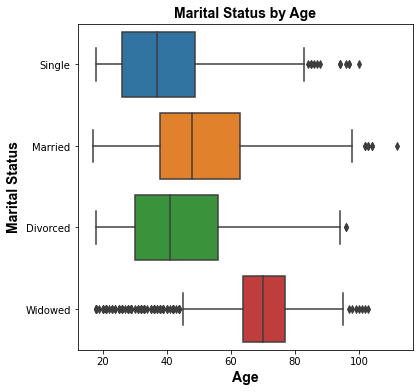

In [272]:
plt.figure(figsize= (6,6))
plt.title('Marital Status by Age', fontdict= font)
plt.xlabel('Age',fontdict=font)
plt.ylabel('Marital Status', fontdict= font)
sns.boxplot(data= clean_df, x = 'Age', y = 'Marital Status',)

In [273]:
young_widow = df[(df['Marital Status']=='Widowed') & (df['Age']<20)]
len(young_widow['Age']) # there was no evidence to show this group was lying.

6

In [274]:
young_divorced = df[(df['Marital Status']=='Divorced') & (df['Age']<20)]
len(young_divorced['Age'])

54

In [275]:
age_bracket = clean_df[clean_df['Age'].between(16,23)]
age_bracket['Marital Status'].value_counts()

Single      766
Divorced    123
Married      86
Widowed      16
Name: Marital Status, dtype: int64

<AxesSubplot:title={'center':'Marital Status '}, xlabel='Marital Status', ylabel='count'>

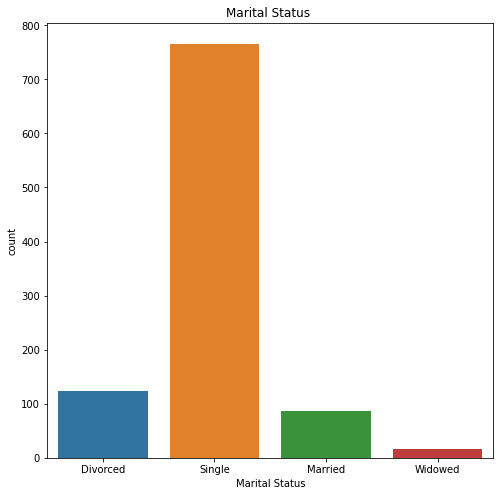

In [276]:
plt.figure(figsize = (8,8))
plt.title("Marital Status ")
sns.countplot(data = age_bracket, x= 'Marital Status')

In [277]:
divorce = clean_df[clean_df['Marital Status']== 'Divorced']

<Figure size 648x648 with 0 Axes>

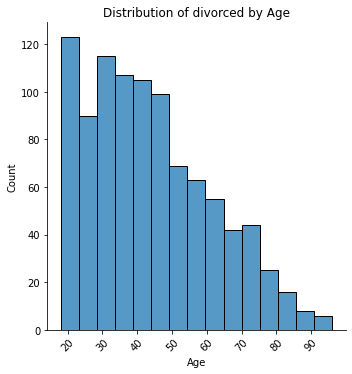

In [278]:
plt.figure(figsize = (9,9))
sns.displot(data= divorce, x= 'Age')
plt.title('Distribution of divorced by Age')

plt.xticks(rotation = 45)

plt.show()

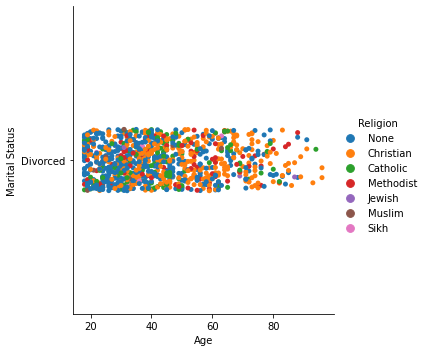

In [279]:
sns.catplot(x="Age", y="Marital Status", hue="Religion", data= divorce)

In [280]:
widow = clean_df[clean_df ['Marital Status']== 'Widowed']


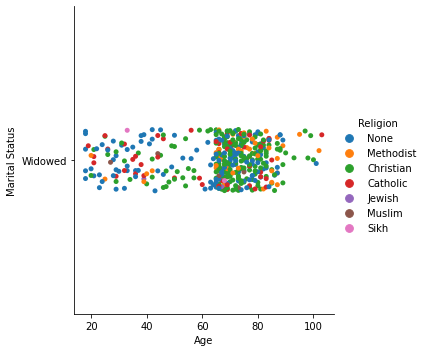

In [281]:
sns.catplot(x="Age", y="Marital Status", hue="Religion", data= widow)

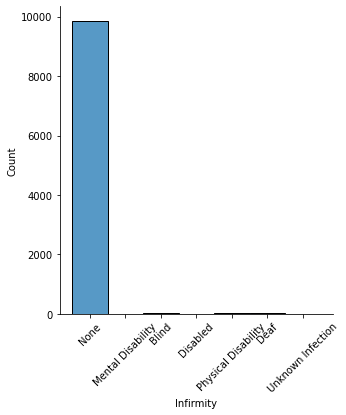

In [282]:
sick_pop =sns.displot (clean_df, x = 'Infirmity' )
plt.xticks(rotation = 45)
plt.show()

#### REFENCES

Python Examples(2021)*Pandas DataFrame – Replace Values in Column based on Condition.* Available Online: https://pythonexamples.org/pandas-dataframe-replace-values-in-column-based-on-condition/ [Accessed 29/11/2021]

Pandas.pydata.org(2021)*pandas.Series.str.capitalize*. Available Online: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.capitalize.html [Accessed 30/11/2021]

tutorialexample.com(2019)*Understand Matplotlib Fontdict: A Beginner Guide – Matplotlib Tutorial.* Available Online: https://www.tutorialexample.com/understand-matplotlib-fontdict-a-beginner-guide-matplotlib-tutorial/ [Accessed 01/12/2021]

In [283]:
# More References to be seen in the report